<a href="https://colab.research.google.com/github/jperdomos/PARCIAL-1-TAM-2025-1/blob/main/PARCIAL_JCPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#librerias que utlizareos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

In [ ]:
# archivo  de Drive
FILEID = "1IO90QXENONyITYlJbkWMZvSxEUHvrPnJ"

# Descargar y extraer ZIP Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt \
--keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | \
sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O ames_dataset.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo
!unzip -o ames_dataset.zip

# Verificar archivos extraídos
!ls -l





--2025-05-24 03:31:57--  https://docs.google.com/uc?export=download&confirm=&id=1IO90QXENONyITYlJbkWMZvSxEUHvrPnJ
Resolving docs.google.com (docs.google.com)... 142.251.107.113, 142.251.107.101, 142.251.107.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IO90QXENONyITYlJbkWMZvSxEUHvrPnJ&export=download [following]
--2025-05-24 03:31:57--  https://drive.usercontent.google.com/download?id=1IO90QXENONyITYlJbkWMZvSxEUHvrPnJ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189065 (185K) [application/octet-stream]
Saving to: ‘ames_dataset.zip’

ames_dataset.zip    100%[===================>] 184.63K 

In [ ]:
%matplotlib inline
csv_path = '/content/AmesHousing.csv' #directorio de la base de datos

Xdata = pd.read_csv(csv_path)#leer archivo csv


Xdata.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
col_drop = [
    'Order', 'PID', 'Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val',
    'Fireplace Qu', 'Garage Yr Blt', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Mo Sold'
]

Xdata.drop(columns = col_drop, inplace = True)
Xdata.head()


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,P,210,62,0,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,140,0,0,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,393,36,0,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,0,0,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,212,34,0,2010,WD,Normal,189900


In [ ]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

In [ ]:
# Partición entrenamiento y evaluación
# Tamaño Xtrain 70%, Tamaño Xtest 30%

Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "SalePrice"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")#se utiliza estimador de moda
ytrain = imputer.fit_transform(pd.DataFrame(ytrain)).reshape(-1)#ajuste sobre la salida
ytest = imputer.transform(pd.DataFrame(ytest)).reshape(-1)#evaluar sobre datos de test

print(ytrain.shape, ytest.shape)

(2051,) (879,)


In [ ]:
# Definir las columnas categóricas (tipo object) a codificar
cat = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation',
       'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition']

# categorías ordenadas por frecuencia para cada columna
items = []
for i in cat:
    items += [list(Xdata[i].value_counts().index)]

# diccionario requerido para el preprocesador personalizado
cat_usr = dict(zip(cat, items))


In [ ]:
cat_usr['MS Zoning']

['RL', 'RM', 'FV', 'RH', 'C (all)', 'I (all)', 'A (agr)']

In [ ]:
Xdata['Sale Condition'].value_counts()

,count
Sale Condition,
Normal,2413
Partial,245
Abnorml,190
Family,46
Alloca,24
AdjLand,12


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd

class mypre_ames(BaseEstimator, TransformerMixin):
    def __init__(self, cat_usr):
        self.cat_usr = cat_usr  # diccionario de columnas categóricas y sus posibles valores

    def fit(self, X, *_):
        Xi = X.copy()

        # Columnas con valores faltantes
        self.cols_missing = Xi.columns[Xi.isna().any()].tolist()

        # Separar columnas por tipo
        self.num_cols = Xi.select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.cat_cols = list(self.cat_usr.keys())

        # Imputadores
        self.num_imputer = SimpleImputer(strategy="median")
        self.cat_imputer = SimpleImputer(strategy="most_frequent")

        self.num_imputer.fit(Xi[self.num_cols])
        self.cat_imputer.fit(Xi[self.cat_cols])

        # Codificador categórico
        cat = [[*self.cat_usr.get(i)] for i in self.cat_cols]
        self.cat_encoder = OrdinalEncoder(categories=cat, handle_unknown='use_encoded_value', unknown_value=-1)

        X_cat_clean = self.cat_imputer.transform(Xi[self.cat_cols])
        self.cat_encoder.fit(X_cat_clean)

        return self

    def transform(self, X, *_):
        Xi = X.copy()

        X_num = pd.DataFrame(
            self.num_imputer.transform(Xi[self.num_cols]),
            columns=self.num_cols,
            index=Xi.index
        )

        X_cat_clean = self.cat_imputer.transform(Xi[self.cat_cols])
        X_cat = pd.DataFrame(
            self.cat_encoder.transform(X_cat_clean),
            columns=self.cat_cols,
            index=Xi.index
        )

        return pd.concat([X_num, X_cat], axis=1)

    def fit_transform(self, X, *_):
        self.fit(X)
        return self.transform(X)


In [ ]:
mypre = mypre_ames(cat_usr=cat_usr)
Xtrain_pre = mypre.fit_transform(Xtrain)
Xtest_pre = mypre.transform(Xtest)
Xtest_pre.to_csv("Xtest_pre.csv", index=False)



In [ ]:
Xtest_pre = mypre.transform(Xtest)

In [ ]:
Xtrain_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 1177 to 2024
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   float64
 1   Lot Frontage     2051 non-null   float64
 2   Lot Area         2051 non-null   float64
 3   Overall Qual     2051 non-null   float64
 4   Overall Cond     2051 non-null   float64
 5   Year Built       2051 non-null   float64
 6   Year Remod/Add   2051 non-null   float64
 7   Mas Vnr Area     2051 non-null   float64
 8   BsmtFin SF 1     2051 non-null   float64
 9   BsmtFin SF 2     2051 non-null   float64
 10  Bsmt Unf SF      2051 non-null   float64
 11  Total Bsmt SF    2051 non-null   float64
 12  1st Flr SF       2051 non-null   float64
 13  2nd Flr SF       2051 non-null   float64
 14  Low Qual Fin SF  2051 non-null   float64
 15  Gr Liv Area      2051 non-null   float64
 16  Bsmt Full Bath   2051 non-null   float64
 17  Bsmt Half Bath  

In [ ]:
corr_matrix = Xtrain_pre.corr()#matriz de correlación
corr_matrix.style.background_gradient(cmap='coolwarm')



,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Yr Sold,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
MS SubClass,1.000000,-0.409562,-0.246954,0.070592,-0.070385,0.051536,0.068073,-0.006270,-0.081573,-0.080292,-0.096544,-0.216248,-0.244353,0.318010,0.038272,0.088802,-0.008893,-0.004329,0.146547,0.170629,-0.006758,0.254758,0.052258,-0.049380,-0.041861,-0.095174,-0.012900,0.011731,-0.027031,-0.032180,0.278981,-0.019243,-0.061703,-0.021556,-0.023591,-0.030615,-0.049004,0.295469,-0.053409,0.010981,0.770294,0.339833,-0.098445,-0.019630,0.013521,0.040498,-0.020238,0.059894,0.013999,-0.037514,0.057667,0.009697,0.042276,-0.138127,-0.036378,0.023205,0.000487,0.087986,0.010188,-0.008677,0.003316,0.128334,0.001889,-0.007818,0.011338,0.005245,-0.019751,0.003372
Lot Frontage,-0.409562,1.000000,0.373403,0.182632,-0.057888,0.113894,0.086913,0.204427,0.169641,0.041651,0.113531,0.309767,0.399035,0.008494,0.011055,0.318039,0.098758,-0.032533,0.160236,0.030554,0.211748,0.015010,0.301594,0.214530,0.291022,0.321826,0.127170,0.121447,0.004189,-0.016494,-0.242763,0.048477,0.112596,0.036349,0.018560,0.033915,0.027494,-0.187021,0.052051,0.038208,-0.334406,-0.093082,0.153003,0.063153,-0.043068,-0.077074,0.084173,0.125163,-0.010973,-0.093657,0.080708,-0.030969,0.099382,-0.024402,0.000384,-0.014574,-0.085244,-0.074635,-0.063224,0.138151,0.019665,-0.054139,0.179111,-0.036456,-0.038132,-0.063363,0.019715,0.053850
Lot Area,-0.246954,0.373403,1.000000,0.111015,-0.047349,0.030281,0.009229,0.135694,0.199352,0.096613,0.022254,0.269611,0.331902,0.023180,0.002791,0.277896,0.137683,0.008609,0.120321,0.040881,0.117028,-0.023920,0.208960,0.245073,0.184410,0.221796,0.160567,0.107029,0.022364,-0.038828,-0.170421,0.033599,0.292217,0.269936,0.027089,0.129468,0.303775,0.024620,0.062524,0.049063,-0.195711,-0.057460,0.152503,0.187665,0.051816,0.031769,0.040231,0.031192,0.008096,-0.035570,0.054010,-0.014572,0.155371,-0.003706,0.024022,0.041511,-0.029152,-0.055681,-0.048179,0.052041,0.085141,-0.041129,0.083456,0.001758,-0.010440,0.004172,-0.005546,0.023392
Overall Qual,0.070592,0.182632,0.111015,1.000000,-0.079386,0.581961,0.570721,0.406574,0.268908,-0.049310,0.265627,0.530765,0.461907,0.251528,-0.035543,0.572848,0.164895,-0.048031,0.524599,0.274086,0.073490,-0.161458,0.382159,0.375551,0.591924,0.554861,0.260918,0.303901,-0.138059,-0.040168,-0.104870,-0.075047,0.253972,-0.033318,-0.030359,0.080578,-0.046584,0.131345,0.006843,0.026295,-0.064149,-0.050744,0.108800,0.068799,-0.222216,-0.212710,0.191223,0.555411,-0.163762,-0.480223,0.489302,-0.083043,0.215067,-0.405914,-0.050137,-0.120781,-0.398771,-0.303552,-0.249960,0.443793,-0.161533,-0.139123,0.535586,-0.067304,-0.143018,-0.238794,0.010297,-0.007931
Overall Cond,-0.070385,-0.057888,-0.047349,-0.079386,1.000000,-0.372098,0.047502,-0.141765,-0.045222,0.035614,-0.139861,-0.175017,-0.153964,0.020515,0.015762,-0.100343,-0.040509,0.090834,-0.215570,-0.092332,0.007848,-0.090922,-0.074122,-0.003459,-0.179020,-0.142922,0.020780,-0.082969,0.084917,0.046101,-0.035590,-0.017392,-0.103216,0.023641,-0.006482,0.017607,0.003281,-0.013330,0.032317,0.015823,-0.099909,0.146337,-0.005859,0.020595,0.107156,0.072924,-0.116122,-0.214180,0.145232,0.264616,-0.194663,-0.020626,-0.036818,0.144953,0.080177,-0.048096,0.044370,-0.125367,-0.085864,-0.

In [ ]:
# Agregar la variable de salida al DataFrame procesado
Xtrain_pre2 = Xtrain_pre.copy()
Xtrain_pre2['output'] = ytrain  # ytrain es un ndarray

# Calcular matriz de correlación
Xtrain_pre2.to_csv("Dataset.csv")

corr_matrix2 = Xtrain_pre2.corr()

corr_matrix2.style.background_gradient(cmap='coolwarm')




,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Yr Sold,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,output
MS SubClass,1.000000,-0.409562,-0.246954,0.070592,-0.070385,0.051536,0.068073,-0.006270,-0.081573,-0.080292,-0.096544,-0.216248,-0.244353,0.318010,0.038272,0.088802,-0.008893,-0.004329,0.146547,0.170629,-0.006758,0.254758,0.052258,-0.049380,-0.041861,-0.095174,-0.012900,0.011731,-0.027031,-0.032180,0.278981,-0.019243,-0.061703,-0.021556,-0.023591,-0.030615,-0.049004,0.295469,-0.053409,0.010981,0.770294,0.339833,-0.098445,-0.019630,0.013521,0.040498,-0.020238,0.059894,0.013999,-0.037514,0.057667,0.009697,0.042276,-0.138127,-0.036378,0.023205,0.000487,0.087986,0.010188,-0.008677,0.003316,0.128334,0.001889,-0.007818,0.011338,0.005245,-0.019751,0.003372,-0.066574
Lot Frontage,-0.409562,1.000000,0.373403,0.182632,-0.057888,0.113894,0.086913,0.204427,0.169641,0.041651,0.113531,0.309767,0.399035,0.008494,0.011055,0.318039,0.098758,-0.032533,0.160236,0.030554,0.211748,0.015010,0.301594,0.214530,0.291022,0.321826,0.127170,0.121447,0.004189,-0.016494,-0.242763,0.048477,0.112596,0.036349,0.018560,0.033915,0.027494,-0.187021,0.052051,0.038208,-0.334406,-0.093082,0.153003,0.063153,-0.043068,-0.077074,0.084173,0.125163,-0.010973,-0.093657,0.080708,-0.030969,0.099382,-0.024402,0.000384,-0.014574,-0.085244,-0.074635,-0.063224,0.138151,0.019665,-0.054139,0.179111,-0.036456,-0.038132,-0.063363,0.019715,0.053850,0.332030
Lot Area,-0.246954,0.373403,1.000000,0.111015,-0.047349,0.030281,0.009229,0.135694,0.199352,0.096613,0.022254,0.269611,0.331902,0.023180,0.002791,0.277896,0.137683,0.008609,0.120321,0.040881,0.117028,-0.023920,0.208960,0.245073,0.184410,0.221796,0.160567,0.107029,0.022364,-0.038828,-0.170421,0.033599,0.292217,0.269936,0.027089,0.129468,0.303775,0.024620,0.062524,0.049063,-0.195711,-0.057460,0.152503,0.187665,0.051816,0.031769,0.040231,0.031192,0.008096,-0.035570,0.054010,-0.014572,0.155371,-0.003706,0.024022,0.041511,-0.029152,-0.055681,-0.048179,0.052041,0.085141,-0.041129,0.083456,0.001758,-0.010440,0.004172,-0.005546,0.023392,0.296075
Overall Qual,0.070592,0.182632,0.111015,1.000000,-0.079386,0.581961,0.570721,0.406574,0.268908,-0.049310,0.265627,0.530765,0.461907,0.251528,-0.035543,0.572848,0.164895,-0.048031,0.524599,0.274086,0.073490,-0.161458,0.382159,0.375551,0.591924,0.554861,0.260918,0.303901,-0.138059,-0.040168,-0.104870,-0.075047,0.253972,-0.033318,-0.030359,0.080578,-0.046584,0.131345,0.006843,0.026295,-0.064149,-0.050744,0.108800,0.068799,-0.222216,-0.212710,0.191223,0.555411,-0.163762,-0.480223,0.489302,-0.083043,0.215067,-0.405914,-0.050137,-0.120781,-0.398771,-0.303552,-0.249960,0.443793,-0.161533,-0.139123,0.535586,-0.067304,-0.143018,-0.238794,0.010297,-0.007931,0.796063
Overall Cond,-0.070385,-0.057888,-0.047349,-0.079386,1.000000,-0.372098,0.047502,-0.141765,-0.045222,0.035614,-0.139861,-0.175017,-0.153964,0.020515,0.015762,-0.100343,-0.040509,0.090834,-0.215570,-0.092332,0.007848,-0.090922,-0.074122,-0.003459,-0.179020,-0.142922,0.020780,-0.082969,0.084917,0.046101,-0.035590,-0.017392,-0.103216,0.023641,-0.006482,0.017607,0.003281,-0.013330,0.032317,0.015823,-0.099909,0.146337,-0.005859,0.020595,0.107156,0.072924,-0.116122,-0.214180,0.145232,0.264616,-0.194663,-0.020626,-0.036818,0.144953,0.08017

In [ ]:
abs(corr_matrix2["output"]).sort_values(ascending=False)

,output
output,1.000000
Overall Qual,0.796063
Gr Liv Area,0.706814
Garage Cars,0.642604
Garage Area,0.639418
...,...
Sale Condition,0.012225
Land Contour,0.012075
Sale Type,0.011266
Condition 1,0.008637


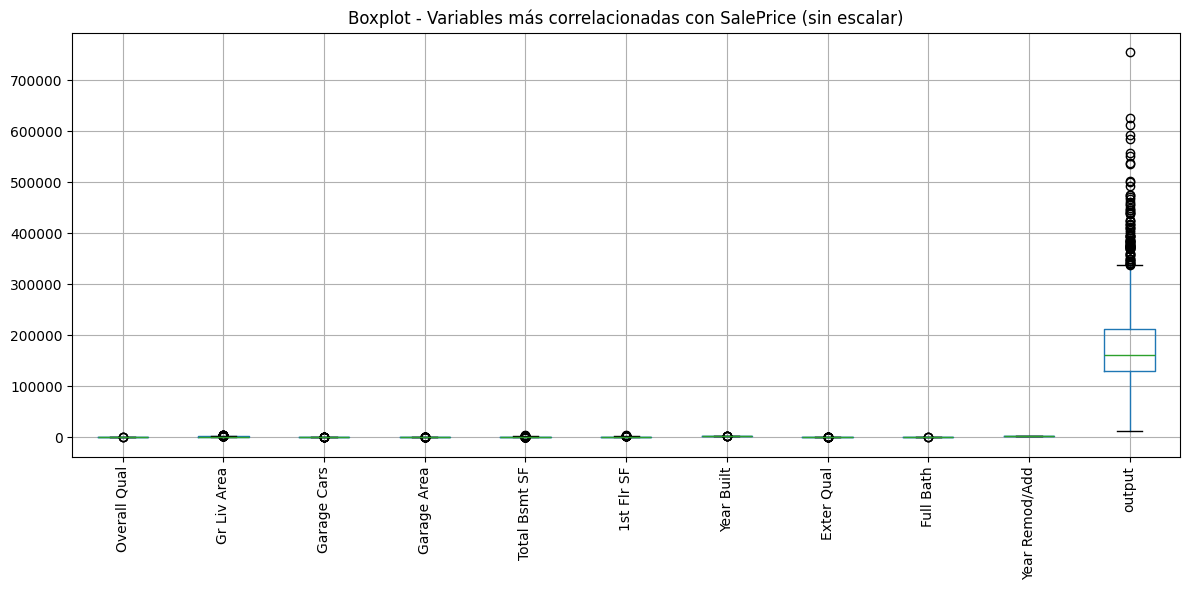

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler

#  variables más correlacionadas
top_corr_vars = abs(corr_matrix2["output"]).sort_values(ascending=False)[1:11].index.tolist()


Xm = Xtrain_pre2[top_corr_vars].copy()

Xm['output'] = ytrain

# Boxplot sin escalar
Xm.boxplot(rot=90, figsize=(12, 6))
plt.title('Boxplot - Variables más correlacionadas con SalePrice (sin escalar)')
plt.tight_layout()
plt.show()




array([[<Axes: xlabel='Overall Qual', ylabel='Overall Qual'>,
        <Axes: xlabel='Gr Liv Area', ylabel='Overall Qual'>,
        <Axes: xlabel='Garage Cars', ylabel='Overall Qual'>,
        <Axes: xlabel='Garage Area', ylabel='Overall Qual'>,
        <Axes: xlabel='Total Bsmt SF', ylabel='Overall Qual'>,
        <Axes: xlabel='1st Flr SF', ylabel='Overall Qual'>,
        <Axes: xlabel='Year Built', ylabel='Overall Qual'>,
        <Axes: xlabel='Exter Qual', ylabel='Overall Qual'>,
        <Axes: xlabel='Full Bath', ylabel='Overall Qual'>,
        <Axes: xlabel='Year Remod/Add', ylabel='Overall Qual'>,
        <Axes: xlabel='output', ylabel='Overall Qual'>],
       [<Axes: xlabel='Overall Qual', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Gr Liv Area', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Garage Cars', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Garage Area', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Total Bsmt SF', ylabel='Gr Liv Area'>,
        <Axes: xlabel='1st Fl

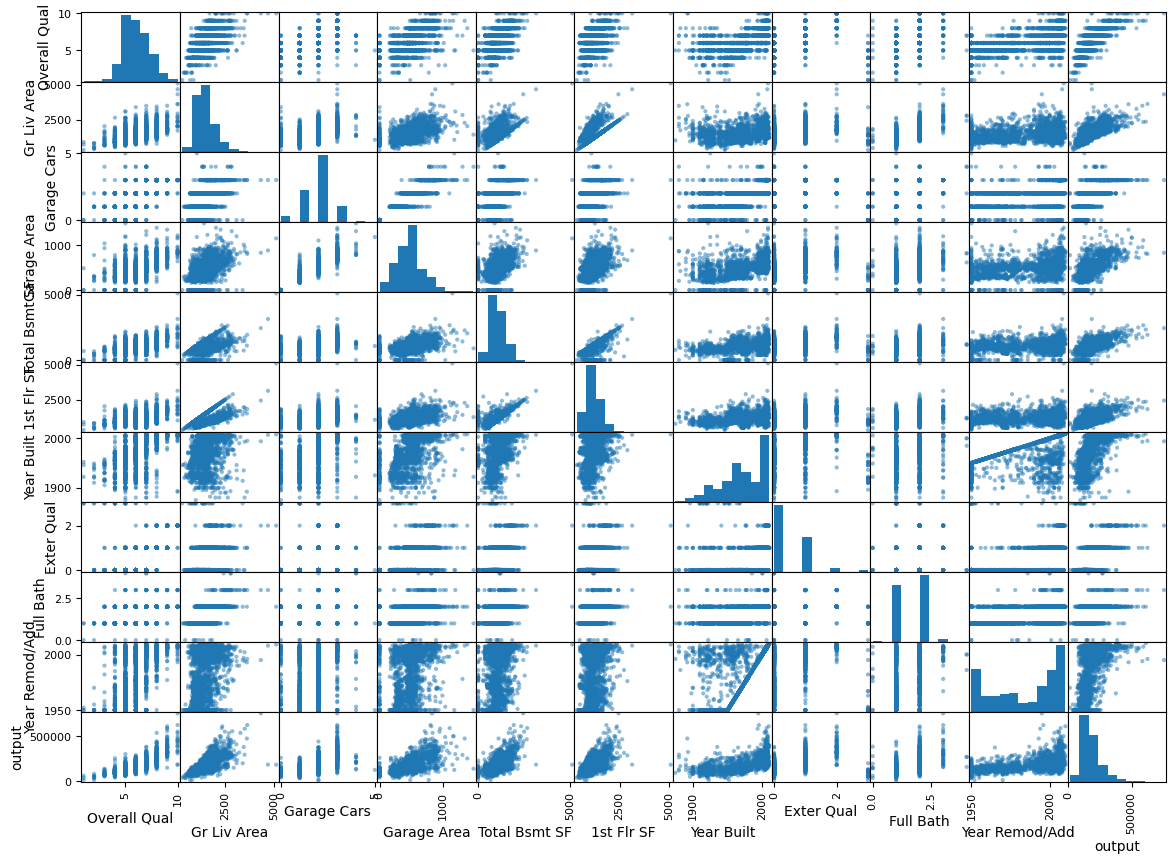

In [ ]:
scatter_matrix(Xm, figsize=(14, 10)) #scatter con histogramas

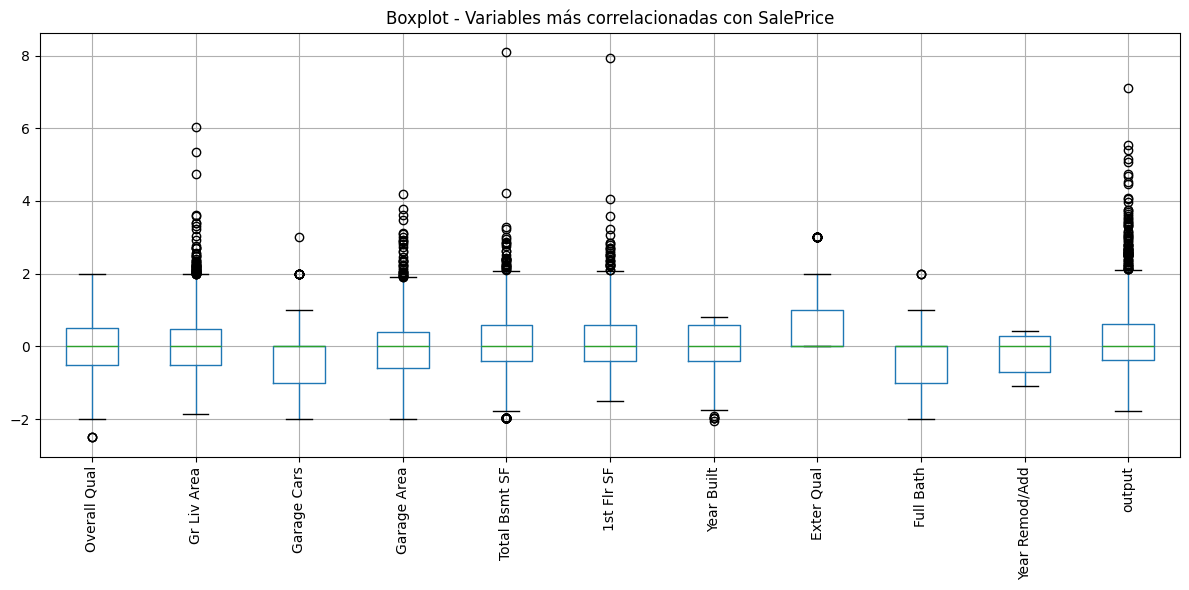

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
##Escalado

scaler = RobustScaler()
#scaler =MinMaxScaler()
#scaler = StandardScaler()
Xm_scaled = pd.DataFrame(scaler.fit_transform(Xm), columns=Xm.columns)

Xm_pre_sca = pd.DataFrame(scaler.fit_transform(Xm),columns=Xm.columns)
Xm_scaled.boxplot(rot=90, figsize=(12, 6))
plt.title('Boxplot - Variables más correlacionadas con SalePrice')
plt.tight_layout()
plt.show()


array([[<Axes: xlabel='Overall Qual', ylabel='Overall Qual'>,
        <Axes: xlabel='Gr Liv Area', ylabel='Overall Qual'>,
        <Axes: xlabel='Garage Cars', ylabel='Overall Qual'>,
        <Axes: xlabel='Garage Area', ylabel='Overall Qual'>,
        <Axes: xlabel='Total Bsmt SF', ylabel='Overall Qual'>,
        <Axes: xlabel='1st Flr SF', ylabel='Overall Qual'>,
        <Axes: xlabel='Year Built', ylabel='Overall Qual'>,
        <Axes: xlabel='Exter Qual', ylabel='Overall Qual'>,
        <Axes: xlabel='Full Bath', ylabel='Overall Qual'>,
        <Axes: xlabel='Year Remod/Add', ylabel='Overall Qual'>,
        <Axes: xlabel='output', ylabel='Overall Qual'>],
       [<Axes: xlabel='Overall Qual', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Gr Liv Area', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Garage Cars', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Garage Area', ylabel='Gr Liv Area'>,
        <Axes: xlabel='Total Bsmt SF', ylabel='Gr Liv Area'>,
        <Axes: xlabel='1st Fl

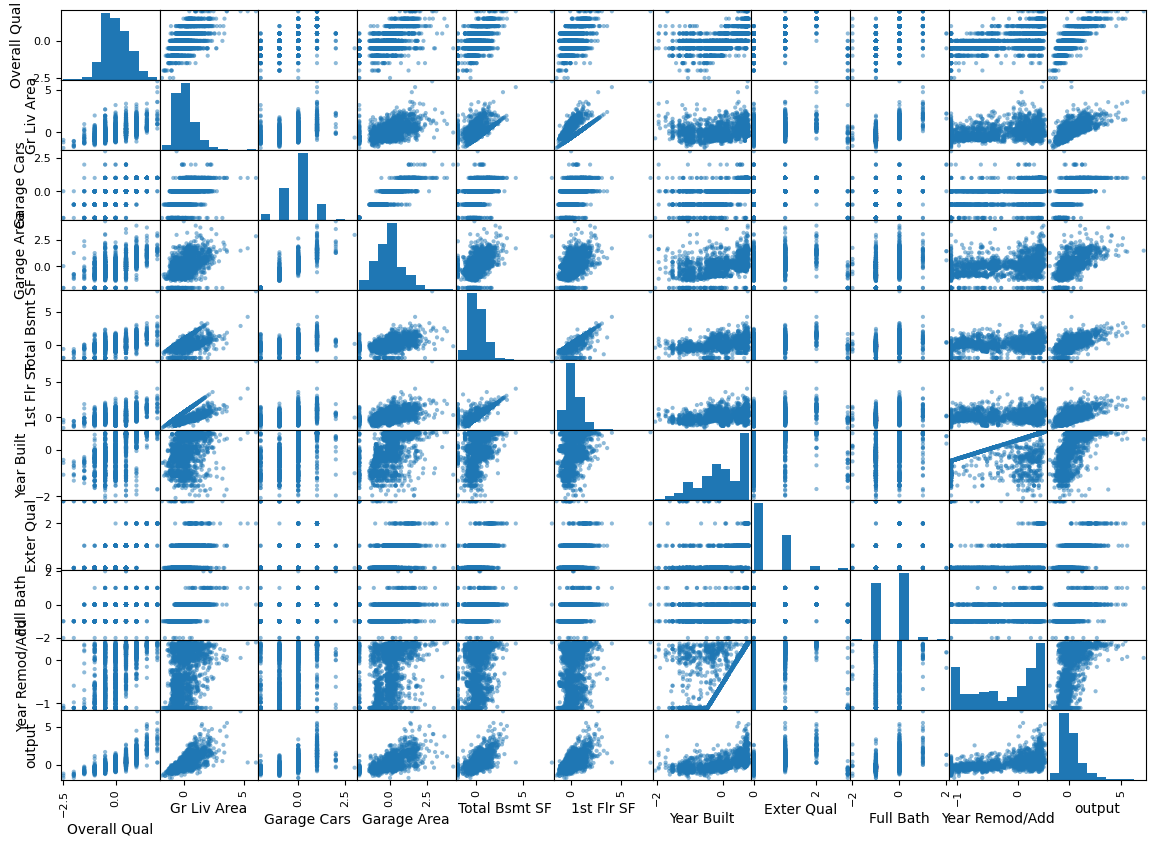

In [ ]:
scatter_matrix(Xm_scaled, figsize=(14, 10), diagonal='hist')


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 12.3 MB/s eta 0:00:00


##LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import (
    make_scorer,
    mean_absolute_error, mean_squared_error,
    r2_score, mean_absolute_percentage_error
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import numpy as np
import matplotlib.pyplot as plt

# Definimos el pipeline
pipeline = Pipeline([
    ('preproceso', mypre_ames(cat_usr=cat_usr)),
    ('scaler',     RobustScaler()),
    ('regresion',  LinearRegression())
])

# Validación cruzada 5‐fold sobre el train
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MAE':  'neg_mean_absolute_error',
    'MSE':  'neg_mean_squared_error',
    'R2':   'r2',
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

cv_results = {}
for name, scorer in scoring.items():
    scores = cross_val_score(pipeline, Xtrain, ytrain,
                             scoring=scorer, cv=kf, n_jobs=-1)
    # revertir signo en las métricas que son "neg_"
    if name in ('MAE', 'MSE', 'MAPE'):
        scores = -scores
    cv_results[name] = {
        'mean': np.mean(scores),
        'std':  np.std(scores)
    }

print("=== CV 5‐fold on TRAIN ===")
for name, vals in cv_results.items():
    if name == 'R2':
        print(f"{name}: {vals['mean']:.4f} ± {vals['std']:.4f}")
    else:
        unit = '%' if name=='MAPE' else ''
        print(f"{name}: {vals['mean']:.2f}{unit} ± {vals['std']:.2f}{unit}")

# Ajustamos el pipeline sobre TODO el train y evaluamos en TEST
pipeline.fit(Xtrain, ytrain)
ytest_pred = pipeline.predict(Xtest)

mae_lr  = mean_absolute_error(ytest, ytest_pred)
mse_lr  = mean_squared_error(ytest, ytest_pred)
r2_lr   = r2_score(ytest, ytest_pred)
mape_lr = mean_absolute_percentage_error(ytest, ytest_pred)*100

print("\n=== PERFORMANCE on TEST ===")
print(f"MAE  : {mae_lr:,.2f}")
print(f"MSE  : {mse_lr:,.2f}")
print(f"R²   : {r2_lr:.4f}")
print(f"MAPE : {mape_lr:.2f}%")




=== CV 5‐fold on TRAIN ===
MAE: 19198.27 ± 641.93
MSE: 980710333.02 ± 270015978.54
R2: 0.8331 ± 0.0614
MAPE: 0.12% ± 0.00%

=== PERFORMANCE on TEST ===
MAE  : 21,021.26
MSE  : 1,347,221,102.69
R²   : 0.8117
MAPE : 12.04%


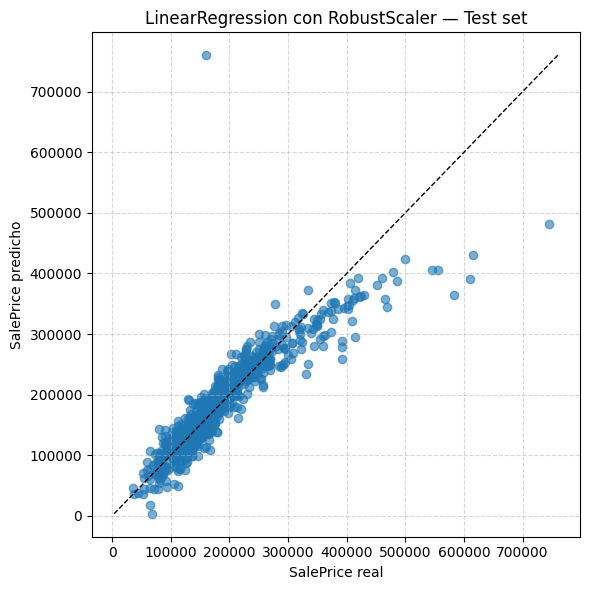

In [ ]:
# Gráfica reales vs predichos en TEST
plt.figure(figsize=(6,6))
plt.scatter(ytest, ytest_pred, alpha=0.6)
lims = [min(ytest.min(), ytest_pred.min()), max(ytest.max(), ytest_pred.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel('SalePrice real')
plt.ylabel('SalePrice predicho')
plt.title('LinearRegression con RobustScaler — Test set')
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

##Lasso

In [ ]:
!pip install optuna


In [ ]:
import numpy as np
import optuna
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

from optuna.samplers import RandomSampler
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)

# bjetivo de Optuna: búsqueda aleatoria de α para Lasso ---
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 10.0, log=True)
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      Lasso(alpha=alpha, max_iter=10000, random_state=42))
    ])
    # Usamos MAE en 5‐fold CV
    score = cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()
    return score

# Configuración del estudio con sampler aleatorio
study = optuna.create_study(
    direction="minimize",
    sampler=RandomSampler()
)
study.optimize(objective, n_trials=30)

# Mejor hiperparámetro encontrado
best_alpha = study.best_params["alpha"]
print(f" Mejor alpha encontrado: {best_alpha:.6f}")

# Visualizaciones de Optuna
plot_optimization_history(study)
plot_param_importances(study)
plot_contour(study, params=["alpha"])
plot_parallel_coordinate(study)


[I 2025-05-24 03:32:55,577] A new study created in memory with name: no-name-9dd90f11-cc21-426c-be13-80ccf6c3ebdb
[I 2025-05-24 03:33:04,464] Trial 0 finished with value: 19133.627527848068 and parameters: {'alpha': 2.0690666384435192}. Best is trial 0 with value: 19133.627527848068.
[I 2025-05-24 03:33:13,731] Trial 1 finished with value: 19136.65336565742 and parameters: {'alpha': 1.4100732961200062}. Best is trial 0 with value: 19133.627527848068.
[I 2025-05-24 03:33:23,511] Trial 2 finished with value: 19142.847525367066 and parameters: {'alpha': 0.017984371457503725}. Best is trial 0 with value: 19133.627527848068.
[I 2025-05-24 03:33:32,711] Trial 3 finished with value: 19142.801000606112 and parameters: {'alpha': 0.04120127195700051}. Best is trial 0 with value: 19133.627527848068.
[I 2025-05-24 03:33:38,606] Trial 4 finished with value: 19142.882722104947 and parameters: {'alpha': 0.00040626882998662624}. Best is trial 0 with value: 19133.627527848068.
[I 2025-05-24 03:33:44,65

 Mejor alpha encontrado: 6.713145


[W 2025-05-24 03:36:06,561] The length of params must be greater than 1.


In [ ]:
import numpy as np
import optuna
from optuna.samplers import GridSampler
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)

# Define el α central (resultado previo) y construye el grid a su alrededor
best_alpha = 1.618972
alphas = np.linspace(best_alpha * 0.5, best_alpha * 1.5, 10)

# Configura el sampler de Optuna para grid search
param_grid = {"alpha": list(alphas)}
sampler = GridSampler(param_grid)

#  Lasso con RobustScaler + CV(5) MAE
def objective(trial):
    alpha = trial.suggest_categorical("alpha", param_grid["alpha"])
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      Lasso(alpha=alpha, max_iter=10000, random_state=42))
    ])
    score = cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()
    return score

# Crea y ejecuta el estudio
study = optuna.create_study(
    direction="minimize",
    sampler=sampler
)
study.optimize(objective, n_trials=len(alphas), show_progress_bar=True)

# Mejor α encontrado
print(f" Mejor alpha (GridSampler): {study.best_params['alpha']:.6f}")

# Visualizaciones de Optuna
plot_optimization_history(study)
plot_param_importances(study)
plot_contour(study, params=["alpha"])
plot_parallel_coordinate(study)


[I 2025-05-24 03:36:06,830] A new study created in memory with name: no-name-44a2e223-3068-4d18-a5a7-46ef09ce86df


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-05-24 03:36:18,153] Trial 0 finished with value: 19137.735771200143 and parameters: {'alpha': np.float64(1.1692575555555555)}. Best is trial 0 with value: 19137.735771200143.
[I 2025-05-24 03:36:23,891] Trial 1 finished with value: 19132.79442732459 and parameters: {'alpha': np.float64(2.248572222222222)}. Best is trial 1 with value: 19132.79442732459.
[I 2025-05-24 03:36:34,244] Trial 2 finished with value: 19136.17299901903 and parameters: {'alpha': np.float64(1.529029111111111)}. Best is trial 1 with value: 19132.79442732459.
[I 2025-05-24 03:36:40,482] Trial 3 finished with value: 19131.94120814482 and parameters: {'alpha': np.float64(2.428458)}. Best is trial 3 with value: 19131.94120814482.
[I 2025-05-24 03:36:50,295] Trial 4 finished with value: 19138.714503801428 and parameters: {'alpha': np.float64(0.9893717777777777)}. Best is trial 3 with value: 19131.94120814482.
[I 2025-05-24 03:36:55,772] Trial 5 finished with value: 19134.518001865046 and parameters: {'alpha': np

[W 2025-05-24 03:37:18,083] The length of params must be greater than 1.


In [ ]:
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Valor base encontrado previamente
best_alpha = 1.529029

# Objetivo para Bayesian Optimization
def objective(trial):
    # Buscar α alrededor del valor base, en escala logarítmica
    alpha = trial.suggest_float("alpha",
                                best_alpha * 0.5,
                                best_alpha * 1.5,
                                log=True)
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      Lasso(alpha=alpha, max_iter=10000, random_state=42))
    ])
    # Validación cruzada 5-fold con MAE
    score = cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()
    return score

# Crear y ejecutar el estudio (TPE sampler)
study = optuna.create_study(
    direction="minimize",
    sampler=TPESampler()
)
study.optimize(objective, n_trials=30)

# Mejor α encontrado
best_alpha_bayes = study.best_params["alpha"]
print(f" Mejor alpha (BayesOpt): {best_alpha_bayes:.6f}")

# Visualizaciones de Optuna
plot_optimization_history(study)
plot_param_importances(study)
plot_contour(study, params=["alpha"])
plot_parallel_coordinate(study)


[I 2025-05-24 03:37:18,111] A new study created in memory with name: no-name-cfbecdce-a66f-477a-9d9c-422564e0c9ac
[I 2025-05-24 03:37:23,676] Trial 0 finished with value: 19134.555985650026 and parameters: {'alpha': 1.8802819663110404}. Best is trial 0 with value: 19134.555985650026.
[I 2025-05-24 03:37:29,272] Trial 1 finished with value: 19138.58016894869 and parameters: {'alpha': 1.014010082745621}. Best is trial 0 with value: 19134.555985650026.
[I 2025-05-24 03:37:35,874] Trial 2 finished with value: 19138.564426887806 and parameters: {'alpha': 1.0169005364223311}. Best is trial 0 with value: 19134.555985650026.
[I 2025-05-24 03:37:41,562] Trial 3 finished with value: 19136.303047786445 and parameters: {'alpha': 1.496824424012816}. Best is trial 0 with value: 19134.555985650026.
[I 2025-05-24 03:37:49,346] Trial 4 finished with value: 19138.52023399297 and parameters: {'alpha': 1.0250152200580902}. Best is trial 0 with value: 19134.555985650026.
[I 2025-05-24 03:37:54,797] Trial 5

 Mejor alpha (BayesOpt): 2.291542


[W 2025-05-24 03:40:03,678] The length of params must be greater than 1.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

# Toma el mejor alpha de la optimización bayesiana
best_alpha_bayes = study.best_params["alpha"]
print(f"Usando alpha = {best_alpha_bayes:.6f} para Lasso final")

#  Define el pipeline final
pipeline_final = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     RobustScaler()),
    ("lasso",      Lasso(alpha=best_alpha_bayes, max_iter=10000, random_state=42))
])

#  Ajusta sobre todo el entrenamiento
pipeline_final.fit(Xtrain, ytrain)

# redice en el conjunto de test
y_pred_test = pipeline_final.predict(Xtest)

# Calcula las métricas
mae_lss  = mean_absolute_error(ytest, y_pred_test)
mse_lss  = mean_squared_error(ytest, y_pred_test)
r2_lss   = r2_score(ytest, y_pred_test)
mape_lss = mean_absolute_percentage_error(ytest, y_pred_test) * 100

#  Muestra resultados
print("\nDesempeño en Test Set:")
print(f" MAE  : {mae_lss:,.2f}")
print(f" MSE  : {mse_lss:,.2f}")
print(f" R²   : {r2_lss:.4f}")
print(f" MAPE : {mape_lss:.2f}%")


Usando alpha = 2.291542 para Lasso final

Desempeño en Test Set:
 MAE  : 21,010.16
 MSE  : 1,346,241,326.69
 R²   : 0.8118
 MAPE : 12.03%


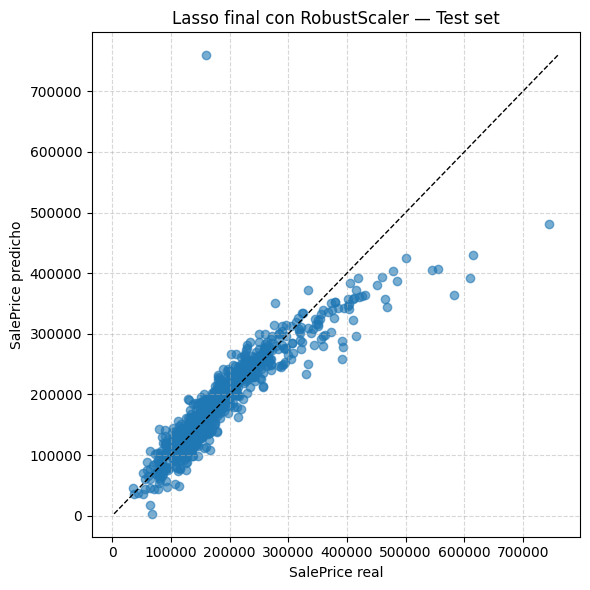

Desempeño en Test Set:
 MAE  : 21,010.16
 MSE  : 1,346,241,326.69
 R²   : 0.8118
 MAPE : 12.03%


In [ ]:
import matplotlib.pyplot as plt

# Ajusta el pipeline final
pipeline_final.fit(Xtrain, ytrain)

# Predice en el conjunto de test
ytest_pred = pipeline_final.predict(Xtest)

# Gráfica reales vs predichos en TEST
plt.figure(figsize=(6,6))
plt.scatter(ytest, ytest_pred, alpha=0.6)
lims = [min(ytest.min(), ytest_pred.min()), max(ytest.max(), ytest_pred.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel('SalePrice real')
plt.ylabel('SalePrice predicho')
plt.title('Lasso final con RobustScaler — Test set')
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

#  imprimir las métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mae  = mean_absolute_error(ytest, ytest_pred)
mse  = mean_squared_error(ytest, ytest_pred)
r2   = r2_score(ytest, ytest_pred)
mape = mean_absolute_percentage_error(ytest, ytest_pred) * 100

print("Desempeño en Test Set:")
print(f" MAE  : {mae:,.2f}")
print(f" MSE  : {mse:,.2f}")
print(f" R²   : {r2:.4f}")
print(f" MAPE : {mape:.2f}%")


#ElasticNet

In [ ]:
import optuna
from optuna.samplers import RandomSampler
from optuna.visualization import plot_param_importances
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# 1) Define la función objetivo para ElasticNet
def objective(trial):
    alpha    = trial.suggest_float("alpha",    1e-4, 10.0, log=True)
    l1_ratio = trial.suggest_float("l1_ratio", 0.0,  1.0)
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            max_iter=10000,
            random_state=42
        ))
    ])
    # 5‐fold CV con MAE
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# 2) Crea el estudio con muestreo aleatorio
study_en = optuna.create_study(
    direction="minimize",
    sampler=RandomSampler()
)

# 3) Ejecuta unos pocos trials para estimar importancia
study_en.optimize(objective, n_trials=10)


[I 2025-05-24 03:40:06,476] A new study created in memory with name: no-name-91c8fe57-1f0a-414b-9f92-36a2ac5651f9
[I 2025-05-24 03:40:06,995] Trial 0 finished with value: 18920.470382153522 and parameters: {'alpha': 1.266034793216706, 'l1_ratio': 0.9696241583356296}. Best is trial 0 with value: 18920.470382153522.
[I 2025-05-24 03:40:07,502] Trial 1 finished with value: 18954.036911241208 and parameters: {'alpha': 0.1612751696138533, 'l1_ratio': 0.2957108269481681}. Best is trial 0 with value: 18920.470382153522.
[I 2025-05-24 03:40:07,994] Trial 2 finished with value: 28447.14203823899 and parameters: {'alpha': 3.4589134346696304, 'l1_ratio': 0.09362938260881548}. Best is trial 0 with value: 18920.470382153522.
[I 2025-05-24 03:40:13,621] Trial 3 finished with value: 19139.19689813081 and parameters: {'alpha': 0.0004827138222903148, 'l1_ratio': 0.7873332640353643}. Best is trial 0 with value: 18920.470382153522.
[I 2025-05-24 03:40:14,164] Trial 4 finished with value: 18942.1015965904

In [ ]:
import optuna.visualization as vis

# Visualización interactiva de importancias
vis.plot_param_importances(study_en).show()


In [ ]:
import optuna
from optuna.samplers import RandomSampler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Ajustamos la búsqueda aleatoria para dar más peso a α (0.93) y menos a l1_ratio (0.07)
def objective(trial):
    # α: muestreo fino en log‐scale (importancia 0.93)
    alpha = trial.suggest_float("alpha", 1e-4, 10.0, log=True)
    # l1_ratio: muestreo grueso con pocos valores (importancia 0.07)
    l1_ratio = trial.suggest_categorical("l1_ratio", [0.0, 0.25, 0.5, 0.75, 1.0])

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            max_iter=10000,
            random_state=42
        ))
    ])

    # 5-fold CV usando MAE
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Crear estudio con sampler aleatorio de Optuna
study_en = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_en.optimize(objective, n_trials=50)

# Resultados
best_alpha    = study_en.best_params["alpha"]
best_l1_ratio = study_en.best_params["l1_ratio"]
print(" ElasticNet Optuna Random Search (α>l1_ratio):")
print(f"  α        = {best_alpha:.6f}")
print(f"  l1_ratio = {best_l1_ratio:.2f}")
print(f"  MAE_CV   = {study_en.best_value:.2f}")

# Visualizaciones de Optuna
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)
plot_optimization_history(study_en)
plot_param_importances(study_en)
plot_contour(study_en, params=["alpha", "l1_ratio"])
plot_parallel_coordinate(study_en)


[I 2025-05-24 03:40:28,360] A new study created in memory with name: no-name-29f8e775-5c13-4743-baf1-005f44386b56
[I 2025-05-24 03:40:34,685] Trial 0 finished with value: 19138.06059584323 and parameters: {'alpha': 0.00017486807190872892, 'l1_ratio': 0.25}. Best is trial 0 with value: 19138.06059584323.
[I 2025-05-24 03:40:40,251] Trial 1 finished with value: 19128.665617003 and parameters: {'alpha': 0.00043044971190583405, 'l1_ratio': 0.0}. Best is trial 1 with value: 19128.665617003.
[I 2025-05-24 03:40:41,483] Trial 2 finished with value: 19100.463199641013 and parameters: {'alpha': 0.008903511844977065, 'l1_ratio': 0.75}. Best is trial 2 with value: 19100.463199641013.
[I 2025-05-24 03:40:47,700] Trial 3 finished with value: 19142.757669467446 and parameters: {'alpha': 0.06280253938815511, 'l1_ratio': 1.0}. Best is trial 2 with value: 19100.463199641013.
[I 2025-05-24 03:40:53,298] Trial 4 finished with value: 19138.915514417848 and parameters: {'alpha': 0.0002192679732335335, 'l1_

 ElasticNet Optuna Random Search (α>l1_ratio):
  α        = 0.059364
  l1_ratio = 0.25
  MAE_CV   = 18912.30


In [ ]:
import optuna
import numpy as np
from optuna.samplers import GridSampler
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Valores base del Random Search (Optuna)
best_alpha = study_en.best_params["alpha"]
best_l1    = study_en.best_params["l1_ratio"]

# Construir grid según importancias
alpha_vals = np.logspace(
    np.log10(best_alpha * 0.8),
    np.log10(best_alpha * 1.2),
    10
)  # grid fino para α
l1_vals = [
    max(0, best_l1 - 0.1),
    best_l1,
    min(1, best_l1 + 0.1)
]  # pocos valores para l1_ratio

param_grid = {
    "alpha": alpha_vals.tolist(),
    "l1_ratio": l1_vals
}
sampler = GridSampler(param_grid)

# Función objetivo para Grid Search con Optuna
def objective_grid(trial):
    alpha = trial.suggest_categorical("alpha", param_grid["alpha"])
    l1_ratio = trial.suggest_categorical("l1_ratio", param_grid["l1_ratio"])
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                                  max_iter=10000, random_state=42))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Ejecutar el estudio
study_grid_en = optuna.create_study(direction="minimize", sampler=sampler)
study_grid_en.optimize(objective_grid,
                       n_trials=len(alpha_vals) * len(l1_vals))

# Mostrar resultados
print(" ElasticNet Grid Search Optuna (α>l1_ratio):")
print(f"  α        = {study_grid_en.best_params['alpha']:.6f}")
print(f"  l1_ratio = {study_grid_en.best_params['l1_ratio']:.2f}")

#  Visualizaciones
plot_optimization_history(study_grid_en)
plot_param_importances(study_grid_en)
plot_contour(study_grid_en, params=["alpha", "l1_ratio"])
plot_parallel_coordinate(study_grid_en)


[I 2025-05-24 03:43:00,303] A new study created in memory with name: no-name-a6028ba3-8fc4-4088-8c27-e3fa174acd60
[I 2025-05-24 03:43:01,135] Trial 0 finished with value: 18939.270227156172 and parameters: {'alpha': 0.04749098148623459, 'l1_ratio': 0.35}. Best is trial 0 with value: 18939.270227156172.
[I 2025-05-24 03:43:01,984] Trial 1 finished with value: 18904.4124555668 and parameters: {'alpha': 0.07123647222935187, 'l1_ratio': 0.25}. Best is trial 1 with value: 18904.4124555668.
[I 2025-05-24 03:43:02,834] Trial 2 finished with value: 18914.80203462602 and parameters: {'alpha': 0.056868782026125116, 'l1_ratio': 0.25}. Best is trial 1 with value: 18904.4124555668.
[I 2025-05-24 03:43:03,633] Trial 3 finished with value: 18917.549531486828 and parameters: {'alpha': 0.054363602900129315, 'l1_ratio': 0.25}. Best is trial 1 with value: 18904.4124555668.
[I 2025-05-24 03:43:04,127] Trial 4 finished with value: 18912.62941227374 and parameters: {'alpha': 0.06809836874128056, 'l1_ratio':

 ElasticNet Grid Search Optuna (α>l1_ratio):
  α        = 0.071236
  l1_ratio = 0.15


In [ ]:
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

#  Valores base del Grid Search
base_alpha = study_grid_en.best_params["alpha"]
base_l1    = study_grid_en.best_params["l1_ratio"]

# Definir rangos según importancias (α:0.93, l1_ratio:0.07)
#    α en log-scale estrecho alrededor de base_alpha
alpha_low, alpha_high = base_alpha * 0.8, base_alpha * 1.2
#    l1_ratio solo puede tomar 3 valores alrededor de base_l1
l1_choices = [
    max(0, base_l1 - 0.1),
    base_l1,
    min(1, base_l1 + 0.1)
]

def objective_bayes_en(trial):
    # α sugerido finamente
    alpha = trial.suggest_float("alpha", alpha_low, alpha_high, log=True)
    # l1_ratio sugerido categóricamente
    l1_ratio = trial.suggest_categorical("l1_ratio", l1_choices)

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            max_iter=10000,
            random_state=42
        ))
    ])
    # fold CV usando MAE
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Crear y ejecutar el estudio con TPE sampler
study_bayes_en = optuna.create_study(direction="minimize", sampler=TPESampler())
study_bayes_en.optimize(objective_bayes_en, n_trials=30)

# Mostrar mejores hiperparámetros
best_alpha_en    = study_bayes_en.best_params["alpha"]
best_l1_ratio_en = study_bayes_en.best_params["l1_ratio"]
print(" ElasticNet Bayesian Optuna TPE (α>l1_ratio):")
print(f"  α        = {best_alpha_en:.6f}")
print(f"  l1_ratio = {best_l1_ratio_en:.2f}")

# Visualizaciones de Optuna
plot_optimization_history(study_bayes_en)
plot_param_importances(study_bayes_en)
plot_contour(study_bayes_en, params=["alpha", "l1_ratio"])
plot_parallel_coordinate(study_bayes_en)


[I 2025-05-24 03:43:23,227] A new study created in memory with name: no-name-4ec4ad27-ff4e-47cf-bf7d-d2c21e0c5e71
[I 2025-05-24 03:43:23,725] Trial 0 finished with value: 18903.00749054724 and parameters: {'alpha': 0.07942010082137216, 'l1_ratio': 0.25}. Best is trial 0 with value: 18903.00749054724.
[I 2025-05-24 03:43:24,239] Trial 1 finished with value: 18904.235708520988 and parameters: {'alpha': 0.06760882438284066, 'l1_ratio': 0.04999999999999999}. Best is trial 0 with value: 18903.00749054724.
[I 2025-05-24 03:43:24,737] Trial 2 finished with value: 18909.8242519462 and parameters: {'alpha': 0.06196072983663928, 'l1_ratio': 0.25}. Best is trial 0 with value: 18903.00749054724.
[I 2025-05-24 03:43:25,253] Trial 3 finished with value: 18909.232296259615 and parameters: {'alpha': 0.0848258223103899, 'l1_ratio': 0.15}. Best is trial 0 with value: 18903.00749054724.
[I 2025-05-24 03:43:25,740] Trial 4 finished with value: 18913.61423355678 and parameters: {'alpha': 0.0580285538684078

 ElasticNet Bayesian Optuna TPE (α>l1_ratio):
  α        = 0.079099
  l1_ratio = 0.25


Usando alpha = 0.079099, l1_ratio = 0.2500 para ElasticNet final

Desempeño ElasticNet final en Test Set:
 MAE  : 20,789.25
 MSE  : 1,337,228,872.10
 R²   : 0.8131
 MAPE : 11.75%


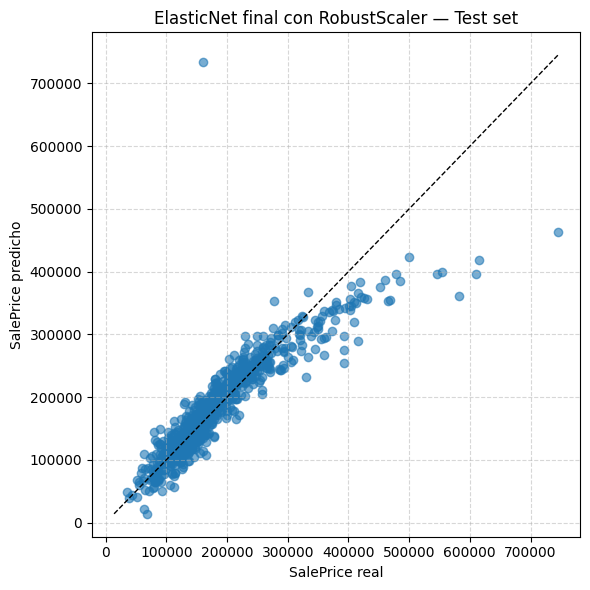

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt

# Recupera los mejores hiperparámetros de ElasticNet tras la optimización bayesiana
best_alpha_en    = study_bayes_en.best_params["alpha"]
best_l1_ratio_en = study_bayes_en.best_params["l1_ratio"]
print(f"Usando alpha = {best_alpha_en:.6f}, l1_ratio = {best_l1_ratio_en:.4f} para ElasticNet final")

# Define el pipeline final con ElasticNet
pipeline_en_final = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     RobustScaler()),
    ("model",      ElasticNet(
        alpha=best_alpha_en,
        l1_ratio=best_l1_ratio_en,
        max_iter=10000,
        random_state=42
    ))
])

# Ajusta sobre todo el entrenamiento
pipeline_en_final.fit(Xtrain, ytrain)

# Predice en el conjunto de test
y_pred_test_en = pipeline_en_final.predict(Xtest)

# Calcula las métricas en test
mae_en  = mean_absolute_error(ytest, y_pred_test_en)
mse_en  = mean_squared_error(ytest, y_pred_test_en)
r2_en   = r2_score(ytest, y_pred_test_en)
mape_en = mean_absolute_percentage_error(ytest, y_pred_test_en) * 100

#  Muestra resultados
print("\nDesempeño ElasticNet final en Test Set:")
print(f" MAE  : {mae_en:,.2f}")
print(f" MSE  : {mse_en:,.2f}")
print(f" R²   : {r2_en:.4f}")
print(f" MAPE : {mape_en:.2f}%")

# Gráfica reales vs predichos en TEST
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred_test_en, alpha=0.6)
lims = [min(ytest.min(), y_pred_test_en.min()), max(ytest.max(), y_pred_test_en.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel('SalePrice real')
plt.ylabel('SalePrice predicho')
plt.title('ElasticNet final con RobustScaler — Test set')
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


#KernelRidge

In [ ]:
!pip install Optuna

In [ ]:
import optuna
from optuna.samplers import RandomSampler
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler



def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 1e1, log=True)
    gamma = trial.suggest_float("gamma", 1e-4, 1e4, log=True)

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      KernelRidge(kernel="rbf", alpha=alpha, gamma=gamma))
    ])

    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

study_init = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_init.optimize(objective, n_trials=20)

[I 2025-05-24 03:43:53,429] A new study created in memory with name: no-name-08ef3608-4189-44f7-8a99-29dcf7f6de2c
[I 2025-05-24 03:43:57,341] Trial 0 finished with value: 24845.831687626436 and parameters: {'alpha': 0.024408403298147387, 'gamma': 0.004359903903166795}. Best is trial 0 with value: 24845.831687626436.
[I 2025-05-24 03:43:59,438] Trial 1 finished with value: 22317.893709106935 and parameters: {'alpha': 0.01585230857162271, 'gamma': 0.0006963787955837917}. Best is trial 1 with value: 22317.893709106935.
[I 2025-05-24 03:44:03,009] Trial 2 finished with value: 84318.4855413734 and parameters: {'alpha': 0.0019630718182210116, 'gamma': 0.11280249740039537}. Best is trial 1 with value: 22317.893709106935.
[I 2025-05-24 03:44:05,602] Trial 3 finished with value: 179824.73959246112 and parameters: {'alpha': 0.14028169760567213, 'gamma': 4947.552150316362}. Best is trial 1 with value: 22317.893709106935.
[I 2025-05-24 03:44:10,210] Trial 4 finished with value: 72652.56907564323 a

In [ ]:
import optuna.visualization as vis

# Muestra qué tan importante fue cada hiperparámetro para explicar la variación en el MAE
vis.plot_param_importances(study_init).show()


In [ ]:
import optuna
from optuna.samplers import RandomSampler
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Ajustamos las propuestas para dar más énfasis a gamma (importancia 0.95)
def objective(trial):
    # α: rango muy estrecho (importancia 0.05)
    alpha = trial.suggest_categorical("alpha", [1e-3, 1e-2, 1e-1])
    # γ: rango amplio en log-scale (importancia 0.95)
    gamma = trial.suggest_float("gamma", 1e-4, 1e4, log=True)

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      KernelRidge(kernel="rbf", alpha=alpha, gamma=gamma))
    ])

    # 5-fold CV usando MAE
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

study_kr = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_kr.optimize(objective, n_trials=30)

best_alpha = study_kr.best_params["alpha"]
best_gamma = study_kr.best_params["gamma"]
print(" KernelRidge Optuna Random Search (γ>α):")
print(f"  α     = {best_alpha:.6f}")
print(f"  γ     = {best_gamma:.6f}")
print(f"  MAE_CV = {study_kr.best_value:.2f}")


[I 2025-05-24 03:44:49,248] A new study created in memory with name: no-name-b03be352-6dd2-4dd3-8d59-de2aeedde674
[I 2025-05-24 03:44:53,720] Trial 0 finished with value: 126550.24442712362 and parameters: {'alpha': 0.1, 'gamma': 0.2291276502870204}. Best is trial 0 with value: 126550.24442712362.
[I 2025-05-24 03:44:56,183] Trial 1 finished with value: 23750.82878053224 and parameters: {'alpha': 0.1, 'gamma': 0.0001459188648927152}. Best is trial 1 with value: 23750.82878053224.
[I 2025-05-24 03:44:58,890] Trial 2 finished with value: 179638.00168754265 and parameters: {'alpha': 0.01, 'gamma': 208.25073352681628}. Best is trial 1 with value: 23750.82878053224.
[I 2025-05-24 03:45:01,147] Trial 3 finished with value: 179731.51302183166 and parameters: {'alpha': 0.01, 'gamma': 2044.83061960517}. Best is trial 1 with value: 23750.82878053224.
[I 2025-05-24 03:45:05,331] Trial 4 finished with value: 179268.10006042948 and parameters: {'alpha': 0.1, 'gamma': 3.646516059026333}. Best is tri

 KernelRidge Optuna Random Search (γ>α):
  α     = 0.001000
  γ     = 0.000304
  MAE_CV = 20651.61


In [ ]:
import optuna
import numpy as np
from optuna.samplers import GridSampler
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# 1) Recupera los mejores valores del Random Search
best_alpha = study_kr.best_params["alpha"]
best_gamma = study_kr.best_params["gamma"]

# 2) Construye un grid según importancias (γ>α)
#    α: solo 3 valores en torno al óptimo
alpha_vals = [best_alpha * 0.8, best_alpha, best_alpha * 1.2]
#    γ: grid fino en log‐scale alrededor del óptimo
gamma_vals = np.logspace(
    np.log10(best_gamma * 0.5),
    np.log10(best_gamma * 1.5),
    10
)

param_grid = {
    "alpha":    alpha_vals,
    "gamma":    gamma_vals.tolist()
}
sampler = GridSampler(param_grid)

# Grid Search
def objective_grid(trial):
    alpha = trial.suggest_categorical("alpha", param_grid["alpha"])
    gamma = trial.suggest_categorical("gamma", param_grid["gamma"])
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      KernelRidge(kernel="rbf", alpha=alpha, gamma=gamma))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# 4) Crea y ejecuta el estudio con GridSampler
study_grid_kr = optuna.create_study(direction="minimize", sampler=sampler)
study_grid_kr.optimize(objective_grid, n_trials=len(alpha_vals)*len(gamma_vals))

print(" KernelRidge Grid Search Optuna (γ>α):")
print(f"  α     = {study_grid_kr.best_params['alpha']:.6f}")
print(f"  γ     = {study_grid_kr.best_params['gamma']:.6f}")

# 6) Visualizaciones de Optuna
plot_optimization_history(study_grid_kr)
plot_param_importances(study_grid_kr)
plot_contour(study_grid_kr, params=["gamma", "alpha"])
plot_parallel_coordinate(study_grid_kr)


[I 2025-05-24 03:46:03,411] A new study created in memory with name: no-name-c4f3f881-519f-433f-a58e-81b1ed3b5117
[I 2025-05-24 03:46:04,650] Trial 0 finished with value: 20494.956323022052 and parameters: {'alpha': 0.0008, 'gamma': 0.0001939133107763049}. Best is trial 0 with value: 20494.956323022052.
[I 2025-05-24 03:46:05,900] Trial 1 finished with value: 20821.731092239082 and parameters: {'alpha': 0.0012, 'gamma': 0.0004033559408202287}. Best is trial 0 with value: 20494.956323022052.
[I 2025-05-24 03:46:07,097] Trial 2 finished with value: 20577.027945898797 and parameters: {'alpha': 0.001, 'gamma': 0.0002190892628293242}. Best is trial 0 with value: 20494.956323022052.
[I 2025-05-24 03:46:08,310] Trial 3 finished with value: 20658.851392585853 and parameters: {'alpha': 0.001, 'gamma': 0.00015190801047188128}. Best is trial 0 with value: 20494.956323022052.
[I 2025-05-24 03:46:09,700] Trial 4 finished with value: 20712.449960761947 and parameters: {'alpha': 0.0012, 'gamma': 0.00

 KernelRidge Grid Search Optuna (γ>α):
  α     = 0.000800
  γ     = 0.000194


In [ ]:
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_parallel_coordinate
)
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# 1) Recupera los mejores valores del Grid Search
base_alpha = study_grid_kr.best_params["alpha"]
base_gamma = study_grid_kr.best_params["gamma"]

# 2) Define rangos ajustados según importancias (γ>α)
alpha_low, alpha_high = base_alpha * 0.9, base_alpha * 1.1      # α: rango estrecho
gamma_low, gamma_high = base_gamma * 0.5, base_gamma * 1.5      # γ: rango amplio

# 3) Objetivo para Bayesian Optimization (TPE)
def objective_bayes_kr(trial):
    alpha = trial.suggest_float("alpha", alpha_low, alpha_high, log=True)
    gamma = trial.suggest_float("gamma", gamma_low, gamma_high, log=True)
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("model",      KernelRidge(kernel="rbf", alpha=alpha, gamma=gamma))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# 4) Crear y ejecutar el estudio con TPESampler
study_bayes_kr2 = optuna.create_study(direction="minimize", sampler=TPESampler())
study_bayes_kr2.optimize(objective_bayes_kr, n_trials=30)

# 5) Mostrar los mejores hiperparámetros
best_alpha_bayes = study_bayes_kr2.best_params["alpha"]
best_gamma_bayes = study_bayes_kr2.best_params["gamma"]
print(" KernelRidge Bayesian Optuna TPE refinado:")
print(f"  alpha = {best_alpha_bayes:.6f}")
print(f"  gamma = {best_gamma_bayes:.6f}")

# 6) Visualizaciones de Optuna
plot_optimization_history(study_bayes_kr2)
plot_param_importances(study_bayes_kr2)
plot_contour(study_bayes_kr2, params=["gamma", "alpha"])
plot_parallel_coordinate(study_bayes_kr2)


[I 2025-05-24 03:47:02,221] A new study created in memory with name: no-name-a0cacb4c-de2a-4f34-a6e7-065860e22ef3
[I 2025-05-24 03:47:03,423] Trial 0 finished with value: 20508.3548349157 and parameters: {'alpha': 0.0008287793396496162, 'gamma': 0.00020233892254670335}. Best is trial 0 with value: 20508.3548349157.
[I 2025-05-24 03:47:05,277] Trial 1 finished with value: 20650.28693011448 and parameters: {'alpha': 0.0008133816182007424, 'gamma': 0.00012376710047187086}. Best is trial 0 with value: 20508.3548349157.
[I 2025-05-24 03:47:07,116] Trial 2 finished with value: 20511.071234375642 and parameters: {'alpha': 0.0008104618093547847, 'gamma': 0.0002220621724046151}. Best is trial 0 with value: 20508.3548349157.
[I 2025-05-24 03:47:08,342] Trial 3 finished with value: 20517.310731681697 and parameters: {'alpha': 0.0007499107288342459, 'gamma': 0.00024613377538365957}. Best is trial 0 with value: 20508.3548349157.
[I 2025-05-24 03:47:09,578] Trial 4 finished with value: 20553.7418833

 KernelRidge Bayesian Optuna TPE refinado:
  alpha = 0.000720
  gamma = 0.000173


Usando alpha = 0.000720, gamma = 0.000173 para KernelRidge final

Desempeño KernelRidge final en Test Set:
 MAE  : 19,673.20
 MSE  : 980,559,522.79
 R²   : 0.8629
 MAPE : 11.46%


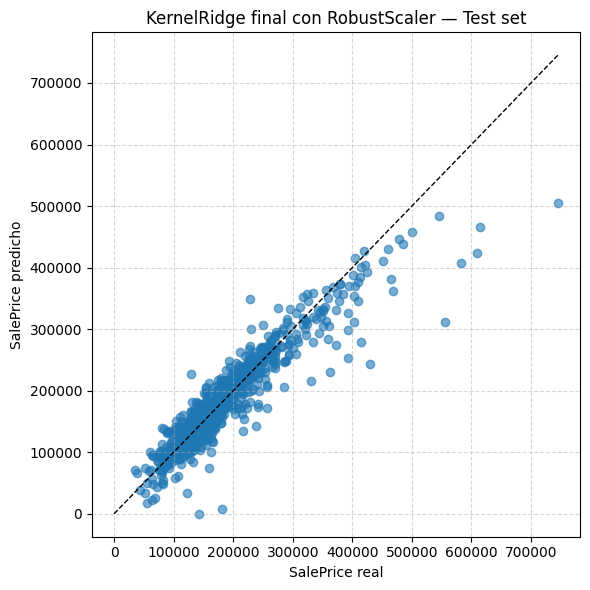

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt

# 1) Recupera los mejores hiperparámetros de KernelRidge tras la optimización bayesiana
best_alpha_kr = study_bayes_kr2.best_params["alpha"]
best_gamma_kr = study_bayes_kr2.best_params["gamma"]
print(f"Usando alpha = {best_alpha_kr:.6f}, gamma = {best_gamma_kr:.6f} para KernelRidge final")

# 2) Define el pipeline final con KernelRidge
pipeline_kr_final = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     RobustScaler()),
    ("model",      KernelRidge(
        kernel="rbf",
        alpha=best_alpha_kr,
        gamma=best_gamma_kr
    ))
])

# 3) Ajusta sobre todo el entrenamiento
pipeline_kr_final.fit(Xtrain, ytrain)

# 4) Predice en el conjunto de test
y_pred_test_kr = pipeline_kr_final.predict(Xtest)

# 5) Calcula las métricas en test
mae_kr  = mean_absolute_error(ytest, y_pred_test_kr)
mse_kr  = mean_squared_error(ytest, y_pred_test_kr)
r2_kr   = r2_score(ytest, y_pred_test_kr)
mape_kr = mean_absolute_percentage_error(ytest, y_pred_test_kr) * 100

# 6) Muestra resultados
print("\nDesempeño KernelRidge final en Test Set:")
print(f" MAE  : {mae_kr:,.2f}")
print(f" MSE  : {mse_kr:,.2f}")
print(f" R²   : {r2_kr:.4f}")
print(f" MAPE : {mape_kr:.2f}%")

# 7) Gráfica reales vs predichos en TEST
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred_test_kr, alpha=0.6)
lims = [min(ytest.min(), y_pred_test_kr.min()), max(ytest.max(), y_pred_test_kr.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel('SalePrice real')
plt.ylabel('SalePrice predicho')
plt.title('KernelRidge final con RobustScaler — Test set')
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


#SGDRegressor

In [ ]:
# Random Search
import optuna
from optuna.samplers import RandomSampler
import optuna.visualization as vis
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

def objective_random(trial):
    penalty = trial.suggest_categorical("penalty", ["l2", "l1", "elasticnet"])
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     StandardScaler()),
        ("sgd", SGDRegressor(
            penalty=penalty,
            loss="squared_error",
            learning_rate="constant",
            eta0=0.01,
            max_iter=10000,
            tol=1e-3,
            early_stopping=False,
            average=False,
            random_state=42
        ))
    ])
    scores = cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    )
    return scores.mean()

study_rand = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_rand.optimize(objective_random, n_trials=30)
best_rand = study_rand.best_params
print("Random Search best penalty:", best_rand["penalty"])

vis.plot_optimization_history(study_rand).show()
vis.plot_param_importances(study_rand).show()


[I 2025-05-24 03:47:46,393] A new study created in memory with name: no-name-5aae7522-fafc-42fb-b8a1-97968a5f74f2
[I 2025-05-24 03:47:47,067] Trial 0 finished with value: 47232178655.9771 and parameters: {'penalty': 'l1'}. Best is trial 0 with value: 47232178655.9771.
[I 2025-05-24 03:47:47,467] Trial 1 finished with value: 47232178655.9771 and parameters: {'penalty': 'l1'}. Best is trial 0 with value: 47232178655.9771.
[I 2025-05-24 03:47:47,882] Trial 2 finished with value: 47232178655.9771 and parameters: {'penalty': 'l1'}. Best is trial 0 with value: 47232178655.9771.
[I 2025-05-24 03:47:48,277] Trial 3 finished with value: 47121903083.049835 and parameters: {'penalty': 'l2'}. Best is trial 3 with value: 47121903083.049835.
[I 2025-05-24 03:47:48,677] Trial 4 finished with value: 47232178655.9771 and parameters: {'penalty': 'l1'}. Best is trial 3 with value: 47121903083.049835.
[I 2025-05-24 03:47:49,095] Trial 5 finished with value: 47138363295.87167 and parameters: {'penalty': 'e

Random Search best penalty: l2


In [ ]:
# === 2) Grid Search (penalty fixed from Random Search) ===
import numpy as np
from optuna.samplers import GridSampler
import optuna.visualization as vis
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# define the grid for learning_rate and eta0
param_grid = {
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "eta0": np.logspace(-5, -1, 10).tolist()
}
sampler_grid = GridSampler(param_grid)

def objective_grid(trial):
    lr  = trial.suggest_categorical("learning_rate", param_grid["learning_rate"])
    eta = trial.suggest_categorical("eta0",           param_grid["eta0"])
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     StandardScaler()),
        ("sgd", SGDRegressor(
            penalty=best_rand["penalty"],   # use the penalty found above
            loss="squared_error",
            learning_rate=lr,
            eta0=eta,
            max_iter=10000,
            tol=1e-3,
            early_stopping=False,
            average=False,
            random_state=42
        ))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

study_grid = optuna.create_study(direction="minimize", sampler=sampler_grid)
study_grid.optimize(objective_grid, n_trials=len(param_grid["learning_rate"]) * len(param_grid["eta0"]))
best_grid = study_grid.best_params
print("Grid Search best params:", best_grid)

# Visualizaciones Grid Search
vis.plot_optimization_history(study_grid).show()
vis.plot_param_importances(study_grid).show()
vis.plot_contour(study_grid, params=["eta0"]).show()
vis.plot_parallel_coordinate(study_grid, params=["learning_rate","eta0"]).show()


[I 2025-05-24 03:48:00,129] A new study created in memory with name: no-name-06a748d1-c7d4-48a4-85c5-63f06d890506
[I 2025-05-24 03:48:00,605] Trial 0 finished with value: 19257.566880784078 and parameters: {'learning_rate': 'invscaling', 'eta0': 0.0016681005372000592}. Best is trial 0 with value: 19257.566880784078.
[I 2025-05-24 03:48:00,992] Trial 1 finished with value: 38932.8941532881 and parameters: {'learning_rate': 'constant', 'eta0': 0.0016681005372000592}. Best is trial 0 with value: 19257.566880784078.
[I 2025-05-24 03:48:01,541] Trial 2 finished with value: 1701494829879.4663 and parameters: {'learning_rate': 'optimal', 'eta0': 0.004641588833612777}. Best is trial 0 with value: 19257.566880784078.
[I 2025-05-24 03:48:02,233] Trial 3 finished with value: 19204.115330139775 and parameters: {'learning_rate': 'constant', 'eta0': 2.782559402207126e-05}. Best is trial 3 with value: 19204.115330139775.
[I 2025-05-24 03:48:14,745] Trial 4 finished with value: 19159.985121559683 and 

Grid Search best params: {'learning_rate': 'adaptive', 'eta0': 1e-05}


[W 2025-05-24 03:51:04,626] The length of params must be greater than 1.


In [ ]:
# === 3) Bayesian Optimization (TPE) ===
from optuna.samplers import TPESampler
import optuna.visualization as vis
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

eta_low, eta_high = best_grid["eta0"] * 0.5, best_grid["eta0"] * 1.5

def objective_bayes(trial):
    eta = trial.suggest_float("eta0", eta_low, eta_high, log=True)
    lr  = best_grid["learning_rate"]
    pen = best_rand["penalty"]
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     StandardScaler()),
        ("sgd", SGDRegressor(
            penalty=pen,
            loss="squared_error",
            learning_rate=lr,
            eta0=eta,
            max_iter=10000,
            tol=1e-3,
            early_stopping=False,
            average=False,
            random_state=42
        ))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

study_bayes = optuna.create_study(direction="minimize", sampler=TPESampler())
study_bayes.optimize(objective_bayes, n_trials=20)
best_bayes = study_bayes.best_params
print("Bayesian TPE best params:", best_bayes)

vis.plot_optimization_history(study_bayes).show()
vis.plot_param_importances(study_bayes).show()
vis.plot_contour(study_bayes, params=["eta0"]).show()
vis.plot_parallel_coordinate(study_bayes, params=["eta0"]).show()


[I 2025-05-24 03:51:04,656] A new study created in memory with name: no-name-b714fbf8-ec40-4ede-8727-7a943f7320aa
[I 2025-05-24 03:51:18,673] Trial 0 finished with value: 19153.503527250137 and parameters: {'eta0': 1.4266297963207456e-05}. Best is trial 0 with value: 19153.503527250137.
[I 2025-05-24 03:51:31,106] Trial 1 finished with value: 19154.761185239746 and parameters: {'eta0': 1.472644582020101e-05}. Best is trial 0 with value: 19153.503527250137.
[I 2025-05-24 03:51:50,903] Trial 2 finished with value: 19153.24965714151 and parameters: {'eta0': 9.304587667138989e-06}. Best is trial 2 with value: 19153.24965714151.
[I 2025-05-24 03:52:09,752] Trial 3 finished with value: 19153.941826363625 and parameters: {'eta0': 7.238161303284017e-06}. Best is trial 2 with value: 19153.24965714151.
[I 2025-05-24 03:52:29,252] Trial 4 finished with value: 19154.038961068545 and parameters: {'eta0': 5.4584432721919465e-06}. Best is trial 2 with value: 19153.24965714151.
[I 2025-05-24 03:52:40,

Bayesian TPE best params: {'eta0': 1.1267231279596192e-05}


[W 2025-05-24 03:56:54,141] The length of params must be greater than 1.


In [ ]:
# === 4) Entrenamiento final y evaluación ===
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

pipe_final = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     StandardScaler()),
    ("sgd", SGDRegressor(
        penalty=best_rand["penalty"],
        loss="squared_error",
        learning_rate=best_grid["learning_rate"],
        eta0=best_bayes["eta0"],
        max_iter=10000,
        tol=1e-3,
        early_stopping=False,
        average=False,
        random_state=42
    ))
])

pipe_final.fit(Xtrain, ytrain)
y_pred_train = pipe_final.predict(Xtrain)
y_pred_test  = pipe_final.predict(Xtest)

metrics = {
    "MAE":  mean_absolute_error,
    "MSE":  mean_squared_error,
    "R2":   r2_score,
    "MAPE": lambda y, yhat: mean_absolute_percentage_error(y, yhat) * 100
}

print("\n=== TRAIN Metrics ===")
for name, fn in metrics.items():
    val = fn(ytrain, y_pred_train)
    print(f"{name}: {val:.2f}{'%' if name=='MAPE' else ''}")

print("\n=== TEST Metrics ===")
for name, fn in metrics.items():
    val = fn(ytest, y_pred_test)
    print(f"{name}: {val:.2f}{'%' if name=='MAPE' else ''}")

mae_sgd  = metrics["MAE"](ytest, y_pred_test)
mse_sgd  = metrics["MSE"](ytest, y_pred_test)
r2_sgd   = metrics["R2"](ytest, y_pred_test)
mape_sgd = metrics["MAPE"](ytest, y_pred_test)


=== TRAIN Metrics ===
MAE: 18154.49
MSE: 833589201.73
R2: 0.86
MAPE: 11.06%

=== TEST Metrics ===
MAE: 21020.61
MSE: 1347746401.54
R2: 0.81
MAPE: 12.03%


#BayesianRidge

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import optuna
from optuna.samplers import RandomSampler, GridSampler, TPESampler
import optuna.visualization as vis

# Scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

In [ ]:
# 1) Random Search (rango reducido)
def objective_br_random(trial):
    alpha_1  = trial.suggest_float("alpha_1", 1e-8, 1e-4, log=True)
    alpha_2  = trial.suggest_float("alpha_2", 1e-8, 1e-4, log=True)
    lambda_1 = trial.suggest_float("lambda_1",1e-8, 1e-4, log=True)
    lambda_2 = trial.suggest_float("lambda_2",1e-8, 1e-4, log=True)
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("br", BayesianRidge(
            alpha_1=alpha_1, alpha_2=alpha_2,
            lambda_1=lambda_1, lambda_2=lambda_2
        ))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain, cv=5,
        scoring=make_scorer(mean_absolute_error), n_jobs=-1
    ).mean()

study_br_rand = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_br_rand.optimize(objective_br_random, n_trials=50)
best_br_rand = study_br_rand.best_params

# 2) Grid Search (50 trials over la grilla)
def grid_around(val):
    return np.logspace(np.log10(val*0.5), np.log10(val*1.5), 5).tolist()

grid = {k: grid_around(best_br_rand[k]) for k in best_br_rand}
sampler_grid = GridSampler(grid)

def objective_br_grid(trial):
    params = {k: trial.suggest_categorical(k, grid[k]) for k in grid}
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("br", BayesianRidge(**params))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain, cv=5,
        scoring=make_scorer(mean_absolute_error), n_jobs=-1
    ).mean()

study_br_grid = optuna.create_study(direction="minimize", sampler=sampler_grid)
study_br_grid.optimize(objective_br_grid, n_trials=50)
best_br_grid = study_br_grid.best_params

# 3) Bayesian TPE refinement (30 trials)
ranges = {k: (best_br_grid[k]*0.5, best_br_grid[k]*1.5) for k in best_br_grid}
def objective_br_bayes(trial):
    params = {k: trial.suggest_float(k, *ranges[k], log=True) for k in ranges}
    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("br", BayesianRidge(**params))
    ])
    return cross_val_score(
        pipe, Xtrain, ytrain, cv=5,
        scoring=make_scorer(mean_absolute_error), n_jobs=-1
    ).mean()

study_br_bayes = optuna.create_study(direction="minimize", sampler=TPESampler())
study_br_bayes.optimize(objective_br_bayes, n_trials=30)
best_br_bayes = study_br_bayes.best_params


[I 2025-05-24 03:56:58,921] A new study created in memory with name: no-name-4221eb9b-9f05-4a62-8c1b-ef7ee8708f06
[I 2025-05-24 03:56:59,400] Trial 0 finished with value: 19010.314502645837 and parameters: {'alpha_1': 2.542782589114424e-08, 'alpha_2': 9.723739044670711e-08, 'lambda_1': 5.491333928946124e-07, 'lambda_2': 5.0097434489625705e-06}. Best is trial 0 with value: 19010.314502645837.
[I 2025-05-24 03:56:59,891] Trial 1 finished with value: 19010.3144706751 and parameters: {'alpha_1': 5.127879366478247e-08, 'alpha_2': 4.945568091562354e-07, 'lambda_1': 1.1572568965755983e-05, 'lambda_2': 2.2653472088764102e-08}. Best is trial 1 with value: 19010.3144706751.
[I 2025-05-24 03:57:00,351] Trial 2 finished with value: 19010.31450350639 and parameters: {'alpha_1': 2.859801044022953e-08, 'alpha_2': 3.8364536422434085e-07, 'lambda_1': 2.5256138610006554e-07, 'lambda_2': 8.663583360946779e-08}. Best is trial 1 with value: 19010.3144706751.
[I 2025-05-24 03:57:00,852] Trial 3 finished wit

In [ ]:
# === 2) Grid Search around Random results ===
import numpy as np
from optuna.samplers import GridSampler
import optuna.visualization as vis

def grid_around(val):
    return np.logspace(np.log10(val*0.5), np.log10(val*1.5), 5).tolist()

grid = {
    "alpha_1":  grid_around(best_br_rand["alpha_1"]),
    "alpha_2":  grid_around(best_br_rand["alpha_2"]),
    "lambda_1": grid_around(best_br_rand["lambda_1"]),
    "lambda_2": grid_around(best_br_rand["lambda_2"])
}
sampler_grid = GridSampler(grid)

def objective_br_grid(trial):
    a1 = trial.suggest_categorical("alpha_1",  grid["alpha_1"])
    a2 = trial.suggest_categorical("alpha_2",  grid["alpha_2"])
    l1 = trial.suggest_categorical("lambda_1", grid["lambda_1"])
    l2 = trial.suggest_categorical("lambda_2", grid["lambda_2"])

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("br", BayesianRidge(alpha_1=a1, alpha_2=a2, lambda_1=l1, lambda_2=l2))
    ])
    scores = cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    )
    return scores.mean()

study_br_grid = optuna.create_study(direction="minimize", sampler=sampler_grid)
study_br_grid.optimize(objective_br_grid, n_trials=50)
best_br_grid = study_br_grid.best_params
print("Grid Search best params:", best_br_grid)

# Visualizations
vis.plot_optimization_history(study_br_grid).show()
vis.plot_param_importances(study_br_grid).show()
vis.plot_parallel_coordinate(
    study_br_grid,
    params=["alpha_1","alpha_2","lambda_1","lambda_2"]
).show()


[I 2025-05-24 03:58:06,711] A new study created in memory with name: no-name-52d55667-1f53-4b39-9b4e-26d6f97b0fd1
[I 2025-05-24 03:58:07,181] Trial 0 finished with value: 19010.31435981248 and parameters: {'alpha_1': 3.2374833260341555e-06, 'alpha_2': 1.2149138637960636e-05, 'lambda_1': 4.991339319985982e-05, 'lambda_2': 3.1175534891173786e-06}. Best is trial 0 with value: 19010.31435981248.
[I 2025-05-24 03:58:07,669] Trial 1 finished with value: 19010.314174573017 and parameters: {'alpha_1': 3.2374833260341555e-06, 'alpha_2': 5.329721880392343e-06, 'lambda_1': 0.00011377793203563922, 'lambda_2': 7.106485178877056e-06}. Best is trial 1 with value: 19010.314174573017.
[I 2025-05-24 03:58:08,128] Trial 2 finished with value: 19010.31439469289 and parameters: {'alpha_1': 4.260767672760554e-06, 'alpha_2': 7.014308463048655e-06, 'lambda_1': 3.792597734521302e-05, 'lambda_2': 2.3688283929590176e-06}. Best is trial 1 with value: 19010.314174573017.
[I 2025-05-24 03:58:08,577] Trial 3 finishe

Grid Search best params: {'alpha_1': 1.8691618697827443e-06, 'alpha_2': 5.329721880392343e-06, 'lambda_1': 0.00011377793203563922, 'lambda_2': 5.399761038464928e-06}


In [ ]:
# === 3) Bayesian TPE refinement ===
from optuna.samplers import TPESampler
import optuna.visualization as vis

ranges = {k: (best_br_grid[k]*0.5, best_br_grid[k]*1.5) for k in best_br_grid}

def objective_br_bayes(trial):
    a1 = trial.suggest_float("alpha_1", *ranges["alpha_1"], log=True)
    a2 = trial.suggest_float("alpha_2", *ranges["alpha_2"], log=True)
    l1 = trial.suggest_float("lambda_1",*ranges["lambda_1"], log=True)
    l2 = trial.suggest_float("lambda_2",*ranges["lambda_2"], log=True)

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("br", BayesianRidge(alpha_1=a1, alpha_2=a2, lambda_1=l1, lambda_2=l2))
    ])
    scores = cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    )
    return scores.mean()

study_br_bayes = optuna.create_study(direction="minimize", sampler=TPESampler())
study_br_bayes.optimize(objective_br_bayes, n_trials=20)
best_br_bayes = study_br_bayes.best_params
print("Bayesian TPE best params:", best_br_bayes)

# Visualizations
vis.plot_optimization_history(study_br_bayes).show()
vis.plot_param_importances(study_br_bayes).show()
vis.plot_parallel_coordinate(
    study_br_bayes,
    params=["alpha_1","alpha_2","lambda_1","lambda_2"]
).show()


[I 2025-05-24 03:58:32,760] A new study created in memory with name: no-name-afba1db4-f1bb-4e1f-a485-7d27714b9fd2
[I 2025-05-24 03:58:33,238] Trial 0 finished with value: 19010.31420983128 and parameters: {'alpha_1': 1.6146424836239942e-06, 'alpha_2': 3.6083675349814463e-06, 'lambda_1': 0.0001015614262391513, 'lambda_2': 5.194243111450807e-06}. Best is trial 0 with value: 19010.31420983128.
[I 2025-05-24 03:58:33,701] Trial 1 finished with value: 19010.31424085903 and parameters: {'alpha_1': 1.413417189414253e-06, 'alpha_2': 4.3126623475070866e-06, 'lambda_1': 9.085655156290518e-05, 'lambda_2': 4.269704334201529e-06}. Best is trial 0 with value: 19010.31420983128.
[I 2025-05-24 03:58:34,169] Trial 2 finished with value: 19010.314307477172 and parameters: {'alpha_1': 1.7232723013719926e-06, 'alpha_2': 4.981449467236778e-06, 'lambda_1': 6.790035660814483e-05, 'lambda_2': 7.368333436040328e-06}. Best is trial 0 with value: 19010.31420983128.
[I 2025-05-24 03:58:34,630] Trial 3 finished wi

Bayesian TPE best params: {'alpha_1': 1.1302470023950337e-06, 'alpha_2': 7.891013154174496e-06, 'lambda_1': 0.0001703697065442529, 'lambda_2': 2.736506597956404e-06}



=== TRAIN Metrics ===
MAE: 18118.51
MSE: 835926923.11
R2: 0.86
MAPE: 11.02%

=== TEST Metrics ===
MAE: 20944.60
MSE: 1343193913.53
R2: 0.81
MAPE: 11.94%


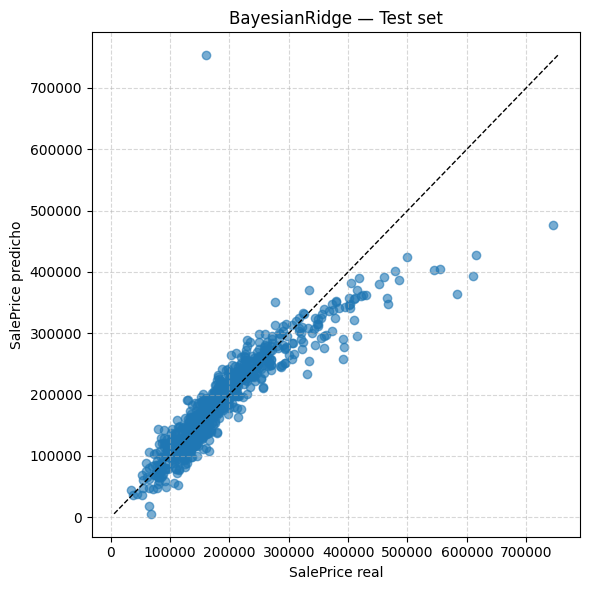

MAE: 20944.60
MSE: 1343193913.53
R2:  0.81
MAPE: 11.94%


In [ ]:
# === 4) Final training and evaluation ===
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt

pipe_final = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     RobustScaler()),
    ("br", BayesianRidge(
        alpha_1=best_br_bayes["alpha_1"],
        alpha_2=best_br_bayes["alpha_2"],
        lambda_1=best_br_bayes["lambda_1"],
        lambda_2=best_br_bayes["lambda_2"]
    ))
])

pipe_final.fit(Xtrain, ytrain)
y_pred_train = pipe_final.predict(Xtrain)
y_pred_test  = pipe_final.predict(Xtest)

metrics = {
    "MAE":  mean_absolute_error,
    "MSE":  mean_squared_error,
    "R2":   r2_score,
    "MAPE": lambda y,h: mean_absolute_percentage_error(y,h)*100
}

print("\n=== TRAIN Metrics ===")
for name, fn in metrics.items():
    val = fn(ytrain, y_pred_train)
    print(f"{name}: {val:.2f}{'%' if name=='MAPE' else ''}")

print("\n=== TEST Metrics ===")
for name, fn in metrics.items():
    val = fn(ytest, y_pred_test)
    print(f"{name}: {val:.2f}{'%' if name=='MAPE' else ''}")

mae_br  = metrics["MAE"](ytest, y_pred_test)
mse_br  = metrics["MSE"](ytest, y_pred_test)
r2_br   = metrics["R2"](ytest, y_pred_test)
mape_br = metrics["MAPE"](ytest, y_pred_test)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred_test, alpha=0.6)
lims = [min(ytest.min(), y_pred_test.min()), max(ytest.max(), y_pred_test.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("SalePrice real")
plt.ylabel("SalePrice predicho")
plt.title("BayesianRidge — Test set")
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"MAE: {mae_br:.2f}")
print(f"MSE: {mse_br:.2f}")
print(f"R2:  {r2_br:.2f}")
print(f"MAPE: {mape_br:.2f}%")


#GaussianProcessRegressor

In [ ]:
# === Random Search optimizado para GPR lineal ===
import numpy as np
import optuna
from optuna.samplers import RandomSampler
import optuna.visualization as vis
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import pandas as pd

# Subconjunto para tuning eficiente
X_sub = Xtrain.sample(n=300, random_state=42)
ytrain_series = pd.Series(ytrain, index=Xtrain.index)
y_sub = ytrain_series.loc[X_sub.index]

# Valor de ruido fijo (bajo ruido)
fixed_noise = 1e-5

# Objetivo para Random Search
def objective_gpr_random(trial):
    sigma_0 = trial.suggest_float("sigma_0", 0.1, 10.0, log=True)  # rango afinado
    kernel = DotProduct(sigma_0=sigma_0) + WhiteKernel(noise_level=fixed_noise)

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("gpr", GaussianProcessRegressor(kernel=kernel, optimizer=None, random_state=42))  # sin ajuste adicional
    ])

    return cross_val_score(
        pipe, X_sub, y_sub,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Estudio con RandomSampler
study_gpr_rand = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_gpr_rand.optimize(objective_gpr_random, n_trials=30)  # más iteraciones por rango más estrecho

# Mostrar el mejor resultado
best_gpr_rand = study_gpr_rand.best_params
print("Random Search best params (lineal afinado):", best_gpr_rand)

# Visualizaciones interactivas de Optuna
vis.plot_optimization_history(study_gpr_rand).show()
vis.plot_param_importances(study_gpr_rand).show()
vis.plot_parallel_coordinate(study_gpr_rand, params=["sigma_0"]).show()


[I 2025-05-24 03:58:44,044] A new study created in memory with name: no-name-e53fbf06-4cb2-4b6a-aa26-bf4f00d01572
[I 2025-05-24 03:58:44,292] Trial 0 finished with value: 22346.483543963433 and parameters: {'sigma_0': 0.15409289124702072}. Best is trial 0 with value: 22346.483543963433.
[I 2025-05-24 03:58:44,561] Trial 1 finished with value: 22346.59896390279 and parameters: {'sigma_0': 6.512316159252409}. Best is trial 0 with value: 22346.483543963433.
[I 2025-05-24 03:58:44,814] Trial 2 finished with value: 22346.464164562225 and parameters: {'sigma_0': 0.10919261914073994}. Best is trial 2 with value: 22346.464164562225.
[I 2025-05-24 03:58:45,063] Trial 3 finished with value: 22346.448155930837 and parameters: {'sigma_0': 0.14073400991524912}. Best is trial 3 with value: 22346.448155930837.
[I 2025-05-24 03:58:45,310] Trial 4 finished with value: 22346.51248282432 and parameters: {'sigma_0': 1.2169791975109767}. Best is trial 3 with value: 22346.448155930837.
[I 2025-05-24 03:58:4

Random Search best params (lineal afinado): {'sigma_0': 0.4305438053586607}


In [ ]:
# === Grid Search refinado (usando DotProduct y noise_level fijo desde Random Search) ===
from optuna.samplers import GridSampler
import numpy as np
import optuna.visualization as vis
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Construir un grid logarítmico alrededor del mejor sigma_0 encontrado en Random Search
def grid_around(val):
    return np.logspace(np.log10(val * 0.5), np.log10(val * 1.5), 20).tolist()

# Rango de sigma_0 centrado en el mejor valor previo
grid = {
    "sigma_0": grid_around(best_gpr_rand["sigma_0"])
}
sampler_grid = GridSampler(grid)

# Fijar el nivel de ruido
fixed_noise = 1e-5

# Objetivo del Grid Search
def objective_gpr_grid(trial):
    s0 = trial.suggest_categorical("sigma_0", grid["sigma_0"])
    kernel = DotProduct(sigma_0=s0) + WhiteKernel(noise_level=fixed_noise)

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("gpr", GaussianProcessRegressor(kernel=kernel, optimizer=None, random_state=42))  # clave: sin optimización interna
    ])

    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Ejecutar Grid Search con todos los valores del grid
study_gpr_grid = optuna.create_study(direction="minimize", sampler=sampler_grid)
study_gpr_grid.optimize(objective_gpr_grid, n_trials=len(grid["sigma_0"]))

# Mejor resultado del grid
best_gpr_grid = study_gpr_grid.best_params
print("Grid Search best params (lineal):", best_gpr_grid)

# Visualizaciones de resultados del Grid Search
vis.plot_optimization_history(study_gpr_grid).show()
vis.plot_contour(study_gpr_grid, params=["sigma_0"]).show()
vis.plot_parallel_coordinate(study_gpr_grid, params=["sigma_0"]).show()


[I 2025-05-24 03:58:52,124] A new study created in memory with name: no-name-ab58c316-3749-4b6c-9848-d2ea59ab0f22
[I 2025-05-24 03:58:54,122] Trial 0 finished with value: 19140.76374392976 and parameters: {'sigma_0': 0.6095326292869642}. Best is trial 0 with value: 19140.76374392976.
[I 2025-05-24 03:58:56,919] Trial 1 finished with value: 19134.74112971814 and parameters: {'sigma_0': 0.22808619189455187}. Best is trial 1 with value: 19134.74112971814.
[I 2025-05-24 03:58:58,615] Trial 2 finished with value: 19141.054428301115 and parameters: {'sigma_0': 0.645815708037991}. Best is trial 1 with value: 19134.74112971814.
[I 2025-05-24 03:59:00,299] Trial 3 finished with value: 19137.200540591635 and parameters: {'sigma_0': 0.34188536402641095}. Best is trial 1 with value: 19134.74112971814.
[I 2025-05-24 03:59:02,074] Trial 4 finished with value: 19137.96159391532 and parameters: {'sigma_0': 0.38379896497003363}. Best is trial 1 with value: 19134.74112971814.
[I 2025-05-24 03:59:03,785]

Grid Search best params (lineal): {'sigma_0': 0.21527190267933036}


[W 2025-05-24 03:59:30,156] The length of params must be greater than 1.


In [ ]:
# === Bayesian TPE (con DotProduct y noise_level fijo desde Grid Search) ===
from optuna.samplers import TPESampler
import optuna.visualization as vis
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Rango de búsqueda en torno al mejor sigma_0 encontrado con Grid Search
s0_low  = best_gpr_grid["sigma_0"] * 0.5
s0_high = best_gpr_grid["sigma_0"] * 1.5
fixed_noise = 1e-5  # ruido fijo, mismo valor usado previamente

# Función objetivo para Optuna con TPE
def objective_gpr_bayes(trial):
    s0 = trial.suggest_float("sigma_0", s0_low, s0_high, log=True)
    kernel = DotProduct(sigma_0=s0) + WhiteKernel(noise_level=fixed_noise)

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("gpr", GaussianProcessRegressor(kernel=kernel, optimizer=None, random_state=42))  # importante: sin optimización interna
    ])

    return cross_val_score(
        pipe, Xtrain, ytrain,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Estudio con optimización bayesiana
study_gpr_bayes = optuna.create_study(direction="minimize", sampler=TPESampler())
study_gpr_bayes.optimize(objective_gpr_bayes, n_trials=30)  # puedes ajustar n_trials si deseas mayor precisión

# Mejor valor obtenido con TPE
best_gpr_bayes = study_gpr_bayes.best_params
print("Bayesian TPE best params (lineal):", best_gpr_bayes)

# Visualizaciones
vis.plot_optimization_history(study_gpr_bayes).show()
vis.plot_contour(study_gpr_bayes, params=["sigma_0"]).show()
vis.plot_parallel_coordinate(study_gpr_bayes, params=["sigma_0"]).show()


[I 2025-05-24 03:59:30,185] A new study created in memory with name: no-name-03fc856a-fb76-4d0a-b007-6b8034d8acab
[I 2025-05-24 03:59:31,906] Trial 0 finished with value: 19133.412398692148 and parameters: {'sigma_0': 0.1698713996939636}. Best is trial 0 with value: 19133.412398692148.
[I 2025-05-24 03:59:33,889] Trial 1 finished with value: 19134.923924448114 and parameters: {'sigma_0': 0.234537816340723}. Best is trial 0 with value: 19133.412398692148.
[I 2025-05-24 03:59:36,575] Trial 2 finished with value: 19133.84848376584 and parameters: {'sigma_0': 0.13322209299015209}. Best is trial 0 with value: 19133.412398692148.
[I 2025-05-24 03:59:38,290] Trial 3 finished with value: 19134.31067591199 and parameters: {'sigma_0': 0.1089226362082263}. Best is trial 0 with value: 19133.412398692148.
[I 2025-05-24 03:59:40,013] Trial 4 finished with value: 19134.798705614892 and parameters: {'sigma_0': 0.2331678310885887}. Best is trial 0 with value: 19133.412398692148.
[I 2025-05-24 03:59:41,

Bayesian TPE best params (lineal): {'sigma_0': 0.1624791056259289}


[W 2025-05-24 04:00:27,075] The length of params must be greater than 1.



=== TRAIN Metrics ===
MAE: 18124.21
MSE: 833199180.51
R2: 0.86
MAPE: 11.04%

=== TEST Metrics ===
MAE: 21021.13
MSE: 1347213955.84
R2: 0.81
MAPE: 12.04%


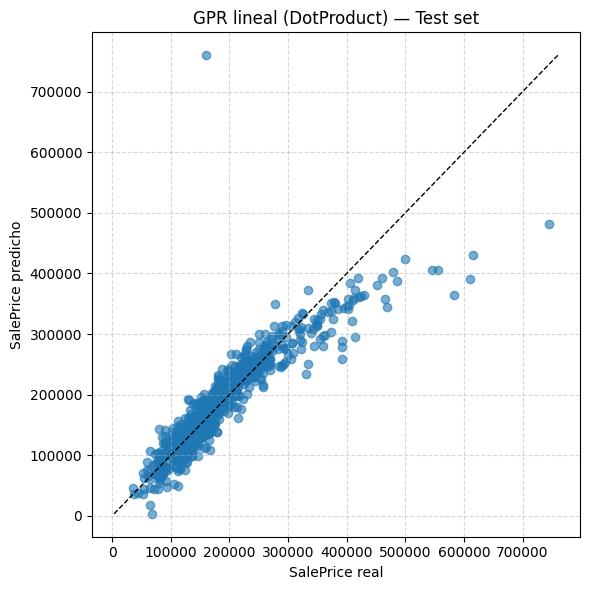

In [ ]:
# === Final training & evaluation: GPR lineal con DotProduct y mejor sigma_0 ===
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Kernel lineal final
kernel = DotProduct(sigma_0=best_gpr_bayes["sigma_0"]) + WhiteKernel(noise_level=1e-5)

# Pipeline final con preprocesamiento, escalado robusto y GPR
pipe_final = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     RobustScaler()),
    ("gpr", GaussianProcessRegressor(kernel=kernel, optimizer=None, random_state=42))  # sin optimización adicional
])

# Entrenamiento final
pipe_final.fit(Xtrain, ytrain)

# Predicción
y_pred_train = pipe_final.predict(Xtrain)
y_pred_test  = pipe_final.predict(Xtest)

# Métricas
metrics = {
    "MAE":  mean_absolute_error,
    "MSE":  mean_squared_error,
    "R2":   r2_score,
    "MAPE": lambda y, h: mean_absolute_percentage_error(y, h) * 100
}

print("\n=== TRAIN Metrics ===")
for name, fn in metrics.items():
    print(f"{name}: {fn(ytrain, y_pred_train):.2f}{'%' if name == 'MAPE' else ''}")

print("\n=== TEST Metrics ===")
for name, fn in metrics.items():
    print(f"{name}: {fn(ytest, y_pred_test):.2f}{'%' if name == 'MAPE' else ''}")

mae_gpr  = metrics["MAE"](ytest, y_pred_test)
mse_gpr  = metrics["MSE"](ytest, y_pred_test)
r2_gpr   = metrics["R2"](ytest, y_pred_test)
mape_gpr = metrics["MAPE"](ytest, y_pred_test)



# Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(ytest, y_pred_test, alpha=0.6)
lims = [min(ytest.min(), y_pred_test.min()), max(ytest.max(), y_pred_test.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("SalePrice real")
plt.ylabel("SalePrice predicho")
plt.title("GPR lineal (DotProduct) — Test set")
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


#RandomForestRegressor

In [ ]:
# === Random Search para RandomForestRegressor ===
import optuna
from optuna.samplers import RandomSampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import pandas as pd

# Subconjunto para tuning
X_sub = Xtrain.sample(n=300, random_state=42)
ytrain_series = pd.Series(ytrain, index=Xtrain.index)
y_sub = ytrain_series.loc[X_sub.index]

def objective_rf_random(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    }

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("rf",         RandomForestRegressor(**params, random_state=42, n_jobs=-1))
    ])

    return cross_val_score(
        pipe, X_sub, y_sub,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Crear el estudio
study_rf_rand = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_rf_rand.optimize(objective_rf_random, n_trials=30)

# Mejor resultado
best_rf_rand = study_rf_rand.best_params
print("Random Search best params (RandomForest):", best_rf_rand)


[I 2025-05-24 04:00:29,853] A new study created in memory with name: no-name-c5cc06dd-f30e-41a8-83ad-b9be222f79f9
[I 2025-05-24 04:00:32,233] Trial 0 finished with value: 21404.228066681935 and parameters: {'n_estimators': 274, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 21404.228066681935.
[I 2025-05-24 04:00:41,094] Trial 1 finished with value: 20384.739501689448 and parameters: {'n_estimators': 447, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 1 with value: 20384.739501689448.
[I 2025-05-24 04:00:43,808] Trial 2 finished with value: 19950.497973579462 and parameters: {'n_estimators': 207, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 2 with value: 19950.497973579462.
[I 2025-05-24 04:00:45,689] Trial 3 finished with value: 21022.143657711644 and parameters: {'n_estimators': 217, 'max_depth': 6, 'min_

Random Search best params (RandomForest): {'n_estimators': 207, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [ ]:
# === Grid Search optimizado para RandomForestRegressor (subconjunto + 20 trials) ===
from optuna.samplers import GridSampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np
import pandas as pd

# Subconjunto para tuning (más rápido)
X_sub = Xtrain.sample(n=300, random_state=42)
ytrain_series = pd.Series(ytrain, index=Xtrain.index)
y_sub = ytrain_series.loc[X_sub.index]

# Función auxiliar para generar valores alrededor del mejor
def around(val, escala=0.2, n=3, tipo=int):
    val_min = max(tipo(val * (1 - escala)), 1)
    val_max = tipo(val * (1 + escala))
    return list(np.linspace(val_min, val_max, n, dtype=tipo))

# Grid reducido centrado en best_rf_rand (máximo 20 combinaciones)
grid = {
    "n_estimators": around(best_rf_rand["n_estimators"], escala=0.2, n=4),
    "max_depth": around(best_rf_rand["max_depth"], escala=0.2, n=3),
    "min_samples_split": [max(2, int(x)) for x in around(best_rf_rand["min_samples_split"], escala=0.3, n=2)],
    "min_samples_leaf": around(best_rf_rand["min_samples_leaf"], escala=0.5, n=2),
    "max_features": [best_rf_rand["max_features"]]
}

# Sampler de grid
sampler_grid = GridSampler(search_space=grid)

# Función objetivo para Grid Search
def objective_rf_grid(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", grid["n_estimators"]),
        "max_depth": trial.suggest_categorical("max_depth", grid["max_depth"]),
        "min_samples_split": trial.suggest_categorical("min_samples_split", grid["min_samples_split"]),
        "min_samples_leaf": trial.suggest_categorical("min_samples_leaf", grid["min_samples_leaf"]),
        "max_features": trial.suggest_categorical("max_features", grid["max_features"])
    }

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("rf", RandomForestRegressor(**params, random_state=42, n_jobs=-1))
    ])

    return cross_val_score(
        pipe, X_sub, y_sub,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Estudio con Grid Search (limitado a 20 combinaciones)
study_rf_grid = optuna.create_study(direction="minimize", sampler=sampler_grid)
study_rf_grid.optimize(objective_rf_grid, n_trials=20)  # límite explícito

# Mejor combinación
best_rf_grid = study_rf_grid.best_params
print("Grid Search best params (RandomForest):", best_rf_grid)


[I 2025-05-24 04:02:20,517] A new study created in memory with name: no-name-d0a8bd63-d840-446c-82f6-d21906ad3161
[I 2025-05-24 04:02:22,372] Trial 0 finished with value: 19960.708869860664 and parameters: {'n_estimators': np.int64(192), 'max_depth': np.int64(11), 'min_samples_split': 5, 'min_samples_leaf': np.int64(1), 'max_features': 'sqrt'}. Best is trial 0 with value: 19960.708869860664.
[I 2025-05-24 04:02:23,961] Trial 1 finished with value: 20141.330592264974 and parameters: {'n_estimators': np.int64(165), 'max_depth': np.int64(9), 'min_samples_split': 5, 'min_samples_leaf': np.int64(1), 'max_features': 'sqrt'}. Best is trial 0 with value: 19960.708869860664.
[I 2025-05-24 04:02:27,047] Trial 2 finished with value: 19634.995281631614 and parameters: {'n_estimators': np.int64(220), 'max_depth': np.int64(11), 'min_samples_split': 2, 'min_samples_leaf': np.int64(1), 'max_features': 'sqrt'}. Best is trial 2 with value: 19634.995281631614.
[I 2025-05-24 04:02:29,552] Trial 3 finished

Grid Search best params (RandomForest): {'n_estimators': np.int64(248), 'max_depth': np.int64(11), 'min_samples_split': 2, 'min_samples_leaf': np.int64(1), 'max_features': 'sqrt'}


In [ ]:
# === Bayesian TPE para RandomForestRegressor (subconjunto + 5 folds) ===
from optuna.samplers import TPESampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np
import pandas as pd

# Subconjunto para tuning
X_sub = Xtrain.sample(n=300, random_state=42)
ytrain_series = pd.Series(ytrain, index=Xtrain.index)
y_sub = ytrain_series.loc[X_sub.index]

# Rango estrecho alrededor de best_rf_grid
def range_around(val, escala=0.2):
    return val * (1 - escala), val * (1 + escala)

n_est_range = range_around(best_rf_grid["n_estimators"], 0.2)
depth_range = range_around(best_rf_grid["max_depth"], 0.2)
split_range = range_around(best_rf_grid["min_samples_split"], 0.3)
leaf_range  = range_around(best_rf_grid["min_samples_leaf"], 0.5)
fixed_feat  = best_rf_grid["max_features"]

# Objetivo para TPE
def objective_rf_bayes(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", int(n_est_range[0]), int(n_est_range[1])),
        "max_depth": trial.suggest_int("max_depth", int(depth_range[0]), int(depth_range[1])),
        "min_samples_split": trial.suggest_int("min_samples_split", max(2, int(split_range[0])), int(split_range[1])),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, int(leaf_range[1])),
        "max_features": fixed_feat
    }

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("rf", RandomForestRegressor(**params, random_state=42, n_jobs=-1))
    ])

    return cross_val_score(
        pipe, X_sub, y_sub,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Ejecutar estudio
study_rf_bayes = optuna.create_study(direction="minimize", sampler=TPESampler())
study_rf_bayes.optimize(objective_rf_bayes, n_trials=20)  # puedes ajustar a tu gusto

# Mejor resultado
best_rf_bayes = study_rf_bayes.best_params
print("Bayesian TPE best params (RandomForest):", best_rf_bayes)


[I 2025-05-24 04:03:07,930] A new study created in memory with name: no-name-0368a114-6a87-4f11-ab26-bd95ef13ea35
[I 2025-05-24 04:03:10,281] Trial 0 finished with value: 19881.351113656823 and parameters: {'n_estimators': 247, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 19881.351113656823.
[I 2025-05-24 04:03:12,792] Trial 1 finished with value: 19872.596724852898 and parameters: {'n_estimators': 259, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 19872.596724852898.
[I 2025-05-24 04:03:14,965] Trial 2 finished with value: 19894.959981793498 and parameters: {'n_estimators': 225, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 19872.596724852898.
[I 2025-05-24 04:03:17,848] Trial 3 finished with value: 19853.301185118657 and parameters: {'n_estimators': 294, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 3 with value: 1

Bayesian TPE best params (RandomForest): {'n_estimators': 272, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}



=== TRAIN Metrics — RandomForest ===
MAE: 7030.89
MSE: 113748791.07
R2: 0.98
MAPE: 4.48%

=== TEST Metrics — RandomForest ===
MAE: 16277.40
MSE: 741341821.95
R2: 0.90
MAPE: 9.59%
MAE: 16277.40
MSE: 741341821.95
R2:  0.90
MAPE: 9.59%


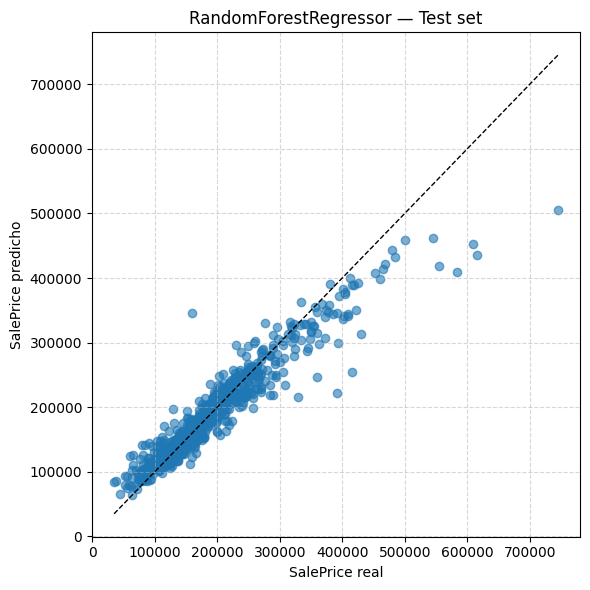

In [ ]:
# === Final training & evaluation: RandomForestRegressor (TPE + Grid) ===
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Pipeline final con preprocesamiento, escalado y RandomForest
pipe_final_rf = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     RobustScaler()),
    ("rf", RandomForestRegressor(
        n_estimators=best_rf_bayes["n_estimators"],
        max_depth=best_rf_bayes["max_depth"],
        min_samples_split=best_rf_bayes["min_samples_split"],
        min_samples_leaf=best_rf_bayes["min_samples_leaf"],
        max_features=best_rf_grid["max_features"],  # Importante: tomado de Grid Search
        random_state=42,
        n_jobs=-1
    ))
])

# Entrenamiento final
pipe_final_rf.fit(Xtrain, ytrain)

# Predicción
y_pred_train_rf = pipe_final_rf.predict(Xtrain)
y_pred_test_rf  = pipe_final_rf.predict(Xtest)

# Métricas
metrics = {
    "MAE":  mean_absolute_error,
    "MSE":  mean_squared_error,
    "R2":   r2_score,
    "MAPE": lambda y, h: mean_absolute_percentage_error(y, h) * 100
}

print("\n=== TRAIN Metrics — RandomForest ===")
for name, fn in metrics.items():
    print(f"{name}: {fn(ytrain, y_pred_train_rf):.2f}{'%' if name == 'MAPE' else ''}")

print("\n=== TEST Metrics — RandomForest ===")
for name, fn in metrics.items():
    print(f"{name}: {fn(ytest, y_pred_test_rf):.2f}{'%' if name == 'MAPE' else ''}")

mae_rfr  = metrics["MAE"](ytest, y_pred_test_rf)
mse_rfr  = metrics["MSE"](ytest, y_pred_test_rf)
r2_rfr   = metrics["R2"](ytest, y_pred_test_rf)
mape_rfr = metrics["MAPE"](ytest, y_pred_test_rf)

print(f"MAE: {mae_rfr:.2f}")
print(f"MSE: {mse_rfr:.2f}")
print(f"R2:  {r2_rfr:.2f}")
print(f"MAPE: {mape_rfr:.2f}%")

# Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(ytest, y_pred_test_rf, alpha=0.6)
lims = [min(ytest.min(), y_pred_test_rf.min()), max(ytest.max(), y_pred_test_rf.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("SalePrice real")
plt.ylabel("SalePrice predicho")
plt.title("RandomForestRegressor — Test set")
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


#Support Vector Machines Regressor

In [ ]:
# === Random Search para Support Vector Regressor (SVR) ===
import optuna
from optuna.samplers import RandomSampler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import pandas as pd

# Subconjunto para tuning (rápido)
X_sub = Xtrain.sample(n=300, random_state=42)
ytrain_series = pd.Series(ytrain, index=Xtrain.index)
y_sub = ytrain_series.loc[X_sub.index]

# Función objetivo
def objective_svr_random(trial):
    params = {
        "kernel": trial.suggest_categorical("kernel", ["rbf", "linear", "poly", "sigmoid"]),
        "C": trial.suggest_float("C", 1e-2, 1e3, log=True),
        "epsilon": trial.suggest_float("epsilon", 1e-3, 1.0, log=True),
        "gamma": trial.suggest_categorical("gamma", ["scale", "auto"])
    }

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("svr", SVR(**params))
    ])

    return cross_val_score(
        pipe, X_sub, y_sub,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Crear y ejecutar estudio
study_svr_rand = optuna.create_study(direction="minimize", sampler=RandomSampler())
study_svr_rand.optimize(objective_svr_random, n_trials=30)

# Mejor combinación
best_svr_rand = study_svr_rand.best_params
print("Random Search best params (SVR):", best_svr_rand)


[I 2025-05-24 04:04:05,229] A new study created in memory with name: no-name-57bb7586-7aed-4037-a3c6-6a7bfd26c58c
[I 2025-05-24 04:04:05,490] Trial 0 finished with value: 56712.534633292584 and parameters: {'kernel': 'linear', 'C': 0.036911395639260804, 'epsilon': 0.005517826499365831, 'gamma': 'scale'}. Best is trial 0 with value: 56712.534633292584.
[I 2025-05-24 04:04:05,747] Trial 1 finished with value: 56538.634937568626 and parameters: {'kernel': 'linear', 'C': 0.05305715629853018, 'epsilon': 0.19779388895762387, 'gamma': 'scale'}. Best is trial 1 with value: 56538.634937568626.
[I 2025-05-24 04:04:06,002] Trial 2 finished with value: 56175.026438000365 and parameters: {'kernel': 'linear', 'C': 0.2563927529483206, 'epsilon': 0.3279140452481067, 'gamma': 'scale'}. Best is trial 2 with value: 56175.026438000365.
[I 2025-05-24 04:04:06,262] Trial 3 finished with value: 57322.91999180384 and parameters: {'kernel': 'poly', 'C': 0.02635025018281358, 'epsilon': 0.2904130692018453, 'gamm

Random Search best params (SVR): {'kernel': 'linear', 'C': 39.88463468813607, 'epsilon': 0.01300206459100411, 'gamma': 'scale'}


In [ ]:
# === Grid Search para SVR (basado en Random Search) ===
from optuna.samplers import GridSampler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Subconjunto para tuning
X_sub = Xtrain.sample(n=300, random_state=42)
ytrain_series = pd.Series(ytrain, index=Xtrain.index)
y_sub = ytrain_series.loc[X_sub.index]

# Función para generar rangos en torno a un valor
def around(val, escala=0.3, n=4, log=False):
    if log:
        base = np.log10(val)
        delta = escala
        return list(np.logspace(base - delta, base + delta, n))
    else:
        return list(np.linspace(val * (1 - escala), val * (1 + escala), n))

# Definir el grid a partir de best_svr_rand
grid = {
    "kernel": [best_svr_rand["kernel"]],
    "C": around(best_svr_rand["C"], escala=0.5, n=4, log=True),
    "epsilon": around(best_svr_rand["epsilon"], escala=0.5, n=3, log=True),
    "gamma": [best_svr_rand["gamma"]]
}

sampler_grid = GridSampler(grid)

# Función objetivo para grid
def objective_svr_grid(trial):
    params = {
        "kernel": trial.suggest_categorical("kernel", grid["kernel"]),
        "C": trial.suggest_categorical("C", grid["C"]),
        "epsilon": trial.suggest_categorical("epsilon", grid["epsilon"]),
        "gamma": trial.suggest_categorical("gamma", grid["gamma"])
    }

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("svr", SVR(**params))
    ])

    return cross_val_score(
        pipe, X_sub, y_sub,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Ejecutar Grid Search
study_svr_grid = optuna.create_study(direction="minimize", sampler=sampler_grid)
study_svr_grid.optimize(objective_svr_grid, n_trials=len(sampler_grid._all_grids))

# Mejor combinación
best_svr_grid = study_svr_grid.best_params
print("Grid Search best params (SVR):", best_svr_grid)


[I 2025-05-24 04:07:15,575] A new study created in memory with name: no-name-e102e8fb-7270-411e-8091-18fa61f3a262
[I 2025-05-24 04:07:16,057] Trial 0 finished with value: 29420.151146383567 and parameters: {'kernel': 'linear', 'C': np.float64(58.54263758461992), 'epsilon': np.float64(0.0041116138392198595), 'gamma': 'scale'}. Best is trial 0 with value: 29420.151146383567.
[I 2025-05-24 04:07:16,830] Trial 1 finished with value: 23190.640529074542 and parameters: {'kernel': 'linear', 'C': np.float64(126.12628925826955), 'epsilon': np.float64(0.04111613839219861), 'gamma': 'scale'}. Best is trial 1 with value: 23190.640529074542.
[I 2025-05-24 04:07:17,128] Trial 2 finished with value: 39053.06095132785 and parameters: {'kernel': 'linear', 'C': np.float64(27.173085290301163), 'epsilon': np.float64(0.013002064591004104), 'gamma': 'scale'}. Best is trial 1 with value: 23190.640529074542.
[I 2025-05-24 04:07:17,867] Trial 3 finished with value: 23190.64072004665 and parameters: {'kernel': 

Grid Search best params (SVR): {'kernel': 'linear', 'C': np.float64(126.12628925826955), 'epsilon': np.float64(0.04111613839219861), 'gamma': 'scale'}


In [ ]:
# === Bayesian TPE para SVR (en torno a best_svr_grid) ===
from optuna.samplers import TPESampler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Subconjunto para tuning
X_sub = Xtrain.sample(n=300, random_state=42)
ytrain_series = pd.Series(ytrain, index=Xtrain.index)
y_sub = ytrain_series.loc[X_sub.index]

# Rangos estrechos en torno a C y epsilon
def range_around(val, escala=0.3, log=True):
    if log:
        base = np.log10(val)
        return 10 ** (base - escala), 10 ** (base + escala)
    else:
        return val * (1 - escala), val * (1 + escala)

c_low, c_high = range_around(best_svr_grid["C"], escala=0.3, log=True)
eps_low, eps_high = range_around(best_svr_grid["epsilon"], escala=0.3, log=True)
fixed_kernel = best_svr_grid["kernel"]
fixed_gamma  = best_svr_grid["gamma"]

# Función objetivo
def objective_svr_bayes(trial):
    params = {
        "kernel": fixed_kernel,
        "C": trial.suggest_float("C", c_low, c_high, log=True),
        "epsilon": trial.suggest_float("epsilon", eps_low, eps_high, log=True),
        "gamma": fixed_gamma
    }

    pipe = Pipeline([
        ("preproceso", mypre_ames(cat_usr=cat_usr)),
        ("scaler",     RobustScaler()),
        ("svr", SVR(**params))
    ])

    return cross_val_score(
        pipe, X_sub, y_sub,
        cv=5,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

# Ejecutar TPE
study_svr_bayes = optuna.create_study(direction="minimize", sampler=TPESampler())
study_svr_bayes.optimize(objective_svr_bayes, n_trials=20)

# Mejor combinación
best_svr_bayes = study_svr_bayes.best_params
print("Bayesian TPE best params (SVR):", best_svr_bayes)


[I 2025-05-24 04:07:22,388] A new study created in memory with name: no-name-4469a744-7b9c-4e48-97be-2ca2f5dfe9d7
[I 2025-05-24 04:07:23,114] Trial 0 finished with value: 25516.97099635422 and parameters: {'C': 88.71642413928096, 'epsilon': 0.03418725060586705}. Best is trial 0 with value: 25516.97099635422.
[I 2025-05-24 04:07:23,799] Trial 1 finished with value: 22665.01246016551 and parameters: {'C': 140.02193261836592, 'epsilon': 0.06699138394652443}. Best is trial 1 with value: 22665.01246016551.
[I 2025-05-24 04:07:24,576] Trial 2 finished with value: 22316.404140176128 and parameters: {'C': 152.09368323100097, 'epsilon': 0.07393610248947054}. Best is trial 2 with value: 22316.404140176128.
[I 2025-05-24 04:07:25,672] Trial 3 finished with value: 22059.63844912395 and parameters: {'C': 161.85912735672474, 'epsilon': 0.07394437864993962}. Best is trial 3 with value: 22059.63844912395.
[I 2025-05-24 04:07:26,123] Trial 4 finished with value: 27918.82989152238 and parameters: {'C': 

Bayesian TPE best params (SVR): {'C': 247.98773336639368, 'epsilon': 0.028445304844525777}



=== TRAIN Metrics — SVR ===
MAE: 17442.63
MSE: 913948641.11
R2: 0.85
MAPE: 10.07%

=== TEST Metrics — SVR ===
MAE: 19909.16
MSE: 1381144078.63
R2: 0.81
MAPE: 10.87%
MAE: 19909.16
MSE: 1381144078.63
R2:  0.81
MAPE: 10.87%


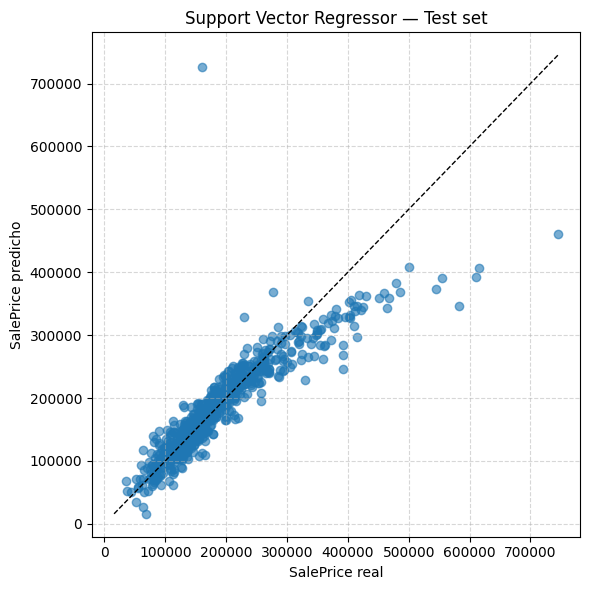

In [ ]:
# === Final training & evaluation: SVR con mejores hiperparámetros (TPE) ===
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Pipeline final
pipe_final_svr = Pipeline([
    ("preproceso", mypre_ames(cat_usr=cat_usr)),
    ("scaler",     RobustScaler()),
    ("svr", SVR(
        kernel=best_svr_grid["kernel"],     # <- fijo
        C=best_svr_bayes["C"],              # <- optimizado por TPE
        epsilon=best_svr_bayes["epsilon"],  # <- optimizado por TPE
        gamma=best_svr_grid["gamma"]        # <- fijo
    ))
])

# Entrenamiento
pipe_final_svr.fit(Xtrain, ytrain)

# Predicción
y_pred_train_svr = pipe_final_svr.predict(Xtrain)
y_pred_test_svr  = pipe_final_svr.predict(Xtest)

# Métricas
metrics = {
    "MAE":  mean_absolute_error,
    "MSE":  mean_squared_error,
    "R2":   r2_score,
    "MAPE": lambda y, h: mean_absolute_percentage_error(y, h) * 100
}

print("\n=== TRAIN Metrics — SVR ===")
for name, fn in metrics.items():
    print(f"{name}: {fn(ytrain, y_pred_train_svr):.2f}{'%' if name == 'MAPE' else ''}")

print("\n=== TEST Metrics — SVR ===")
for name, fn in metrics.items():
    print(f"{name}: {fn(ytest, y_pred_test_svr):.2f}{'%' if name == 'MAPE' else ''}")

mae_svmr = metrics["MAE"](ytest, y_pred_test_svr)
mse_svmr  = metrics["MSE"](ytest, y_pred_test_svr)
r2_svmr  = metrics["R2"](ytest, y_pred_test_svr)
mape_svmr = metrics["MAPE"](ytest, y_pred_test_svr)

print(f"MAE: {mae_svmr:.2f}")
print(f"MSE: {mse_svmr:.2f}")
print(f"R2:  {r2_svmr:.2f}")
print(f"MAPE: {mape_svmr:.2f}%")

# Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(ytest, y_pred_test_svr, alpha=0.6)
lims = [min(ytest.min(), y_pred_test_svr.min()), max(ytest.max(), y_pred_test_svr.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("SalePrice real")
plt.ylabel("SalePrice predicho")
plt.title("Support Vector Regressor — Test set")
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
metricas = [
    {"Modelo": "LinearRegression",        "MAE": mae_lr, "MSE": mse_lr, "R²": r2_lr, "MAPE": mape_lr},
    {"Modelo": "Lasso",                   "MAE": mae_lss, "MSE": mse_lss, "R²": r2_lss, "MAPE": mape_lss},
    {"Modelo": "ElasticNet",              "MAE": mae_en, "MSE": mse_en, "R²": r2_en, "MAPE": mape_en},
    {"Modelo": "KernelRidge",             "MAE": mae_kr, "MSE": mse_kr, "R²": r2_kr, "MAPE": mape_kr},
    {"Modelo": "SGDRegressor",            "MAE": mae_sgd, "MSE": mse_sgd, "R²": r2_sgd, "MAPE": mape_sgd},
    {"Modelo": "BayesianRidge",           "MAE": mae_br, "MSE": mse_br, "R²": r2_br, "MAPE": mape_br},
    {"Modelo": "GaussianProcessRegressor","MAE": mae_gpr, "MSE": mse_gpr, "R²": r2_gpr, "MAPE": mape_gpr},
    {"Modelo": "RandomForestRegressor",   "MAE": mae_rfr, "MSE": mse_rfr, "R²": r2_rfr, "MAPE": mape_rfr},
    {"Modelo": "Support Vector Machines Regressor",  "MAE": mae_svmr, "MSE": mse_svmr, "R²": r2_svmr, "MAPE": mape_svmr}
]
df_metricas = pd.DataFrame(metricas)
df_metricas.to_csv("metricas.csv", index=False)

#DashBoard


In [ ]:
!pip install streamlit colabcode -q
!pip install streamlit colabcode pyngrok --quiet
!pip install pyngrok -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b0

In [ ]:
%%writefile app_streamlit.py
import streamlit as st
st.set_page_config(page_title="MODELS RENDIMIENT", layout="wide")
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import streamlit as st
import base64



df = pd.read_csv("metricas.csv")
df1=pd.read_csv("Dataset.csv")
# Identificar los 3 mejores modelos según R^2 y MAPE (orden inverso para MAPE)
df["R2_norm"] = (df["R²"] - df["R²"].min()) / (df["R²"].max() - df["R²"].min())
df["MAPE_inv"] = 1 - (df["MAPE"] - df["MAPE"].min()) / (df["MAPE"].max() - df["MAPE"].min())
df["score"] = df["R2_norm"] + df["MAPE_inv"]

# Elegir los 3 mejores modelos según la combinación R² alto y MAPE bajo
modelos_destacados = df.sort_values("score", ascending=False).head(3)["Modelo"].tolist()
# Ruta local del logo
logo_path = "logoun.png"

# Codifica la imagen en base64
def get_base64_image(path):
    with open(path, "rb") as f:
        data = f.read()
    return base64.b64encode(data).decode()

# Inserta el logo en el encabezado HTML
logo_base64 = get_base64_image(logo_path)



st.markdown(
    f"""
    <div style="background-color:#006699;padding:10px 20px;border-radius:10px;
                display:flex;justify-content:space-between;align-items:center;">
        <h1 style="color:white;margin:0;">📊 Dashboard de Regresores</h1>
        <img src="data:image/png;base64,{logo_base64}" width="100">
    </div>
    """,
    unsafe_allow_html=True
)

st.markdown("---")
tab1, tab2, tab3 = st.tabs(["Comparación", "Mapa Correlacion", "Dataset"])

with tab1:
    metrics = ["MAE", "MSE", "R²", "MAPE"]
    modelos_list = df["Modelo"].tolist()

    metrica = st.selectbox("Selecciona la métrica para comparar entre modelos:", metrics, index=2)

    # Cuadro para mostrar modelos destacados
    st.markdown(
        """
        <div style="margin-top:-10px;margin-bottom:20px;">
            <span style="display:inline-block;width:16px;height:16px;background-color:orange;margin-right:10px;"></span>
            <b>Best models</b> según combinación de R² alto y MAPE bajo
        </div>
        """,
        unsafe_allow_html=True
    )

    colores = ["orange" if m in modelos_destacados else "lightblue" for m in df["Modelo"]]

    fig1 = px.bar(
        df, x="Modelo", y=metrica,
        text=df[metrica].apply(lambda x: f"{x:.2f}%" if metrica in ["MAPE", "R²"] else f"{x:.2f}"),
        title=f"Comparación de modelos: {metrica}"
    )
    fig1.update_traces(marker_color=colores, textposition='outside')
    st.plotly_chart(fig1, use_container_width=True)

    # Solo permitir seleccionar los 3 mejores
    modelo_sel = st.selectbox("Selecciona un modelo para ver todas sus métricas:", modelos_destacados)
    fila = df[df["Modelo"] == modelo_sel].iloc[0]

    fig_mae_mse = go.Figure()
    fig_mae_mse.add_trace(go.Bar(
        x=["MAE"], y=[fila["MAE"]],
        name="MAE", marker_color="skyblue",
        text=[f"{fila['MAE']:.2f}"], textposition="outside"
    ))
    fig_mae_mse.add_trace(go.Bar(
        x=["MSE"], y=[fila["MSE"]],
        name="MSE", marker_color="deepskyblue",
        text=[f"{fila['MSE']:.2f}"], textposition="outside"
    ))
    fig_mae_mse.update_layout(title=f"Errores absolutos de {modelo_sel}", yaxis_title="Valor")
    st.plotly_chart(fig_mae_mse, use_container_width=True)

    # R2 y MAPE con signo %
    fig_r2_mape = px.bar(
        x=["R²", "MAPE"],
        y=[fila["R²"], fila["MAPE"]],
        text=[f"{fila['R²']:.2f}%", f"{fila['MAPE']:.2f}%"],
        labels={'x': 'Métrica', 'y': 'Valor'},
        title=f"Rendimiento de {modelo_sel}"
    )
    fig_r2_mape.update_traces(textposition='outside', marker_color='crimson')
    st.plotly_chart(fig_r2_mape, use_container_width=True)

with tab2:
    corr_matrix = df1.corr()
    st.subheader("📈 Matriz de Correlación (Xtrain_pre)")
    st.dataframe(corr_matrix.style.background_gradient(cmap='coolwarm'), use_container_width=True)



with tab3:
    st.subheader("📄 Vista del conjunto de datos preprocesado")
    st.dataframe(df1, use_container_width=True)






Writing app_streamlit.py


In [ ]:
from colabcode import ColabCode
from pyngrok import ngrok

# Token personal de ngrok
token = "2xVfWOXykkYHciob8kPPbhpmSi5_7dKb5TEzk69T3JB2Dcogo"  # Reemplaza con tu token
ngrok.set_auth_token(token)
public_url = ngrok.connect(8501)
print(f"🌐 URL pública: {public_url}")

🌐 URL pública: NgrokTunnel: "https://4b02-35-196-72-202.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app_streamlit.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.72.202:8501

  Stopping...


In [ ]:
!ls


ames_dataset.zip  app_streamlit.py  logoun.png	  sample_data
AmesHousing.csv   Dataset.csv	    metricas.csv  Xtest_pre.csv


In [ ]:
!zip -r PARCIAL_TAM_JDMP.zip app_streamlit.py metricas.csv logoun.png Xtrain_pre.csv matriz_correlacion.csv


	zip warning: name not matched: Xtrain_pre.csv
	zip warning: name not matched: matriz_correlacion.csv
  adding: app_streamlit.py (deflated 57%)
  adding: metricas.csv (deflated 40%)
  adding: logoun.png (deflated 2%)


In [ ]:
from google.colab import files
files.download("PARCIAL_TAM_JDMP.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>